In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot  as plt
from sklearn import tree
from collections import Counter
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from scipy import stats
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score, RepeatedKFold, KFold, cross_validate, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, precision_recall_curve, make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import xgboost 
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from Analysis_functions import *
pd.set_option('display.max_colwidth', None)
from itertools import repeat
warnings.filterwarnings('ignore')

[NbConvertApp] Converting notebook Analysis_functions.ipynb to script
[NbConvertApp] Writing 15076 bytes to Analysis_functions.py


Creating lists for table with final results at the very end, 4 metrics used for models evaluation:
* precision
* recall
* f1 score
* accuracy
* specificity

# all features
train-test split, 20% of samples are test, seed is not random

proportions between 1 and 0 class are the same in both test and train sets

 
WAVE:  1
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=100)
 


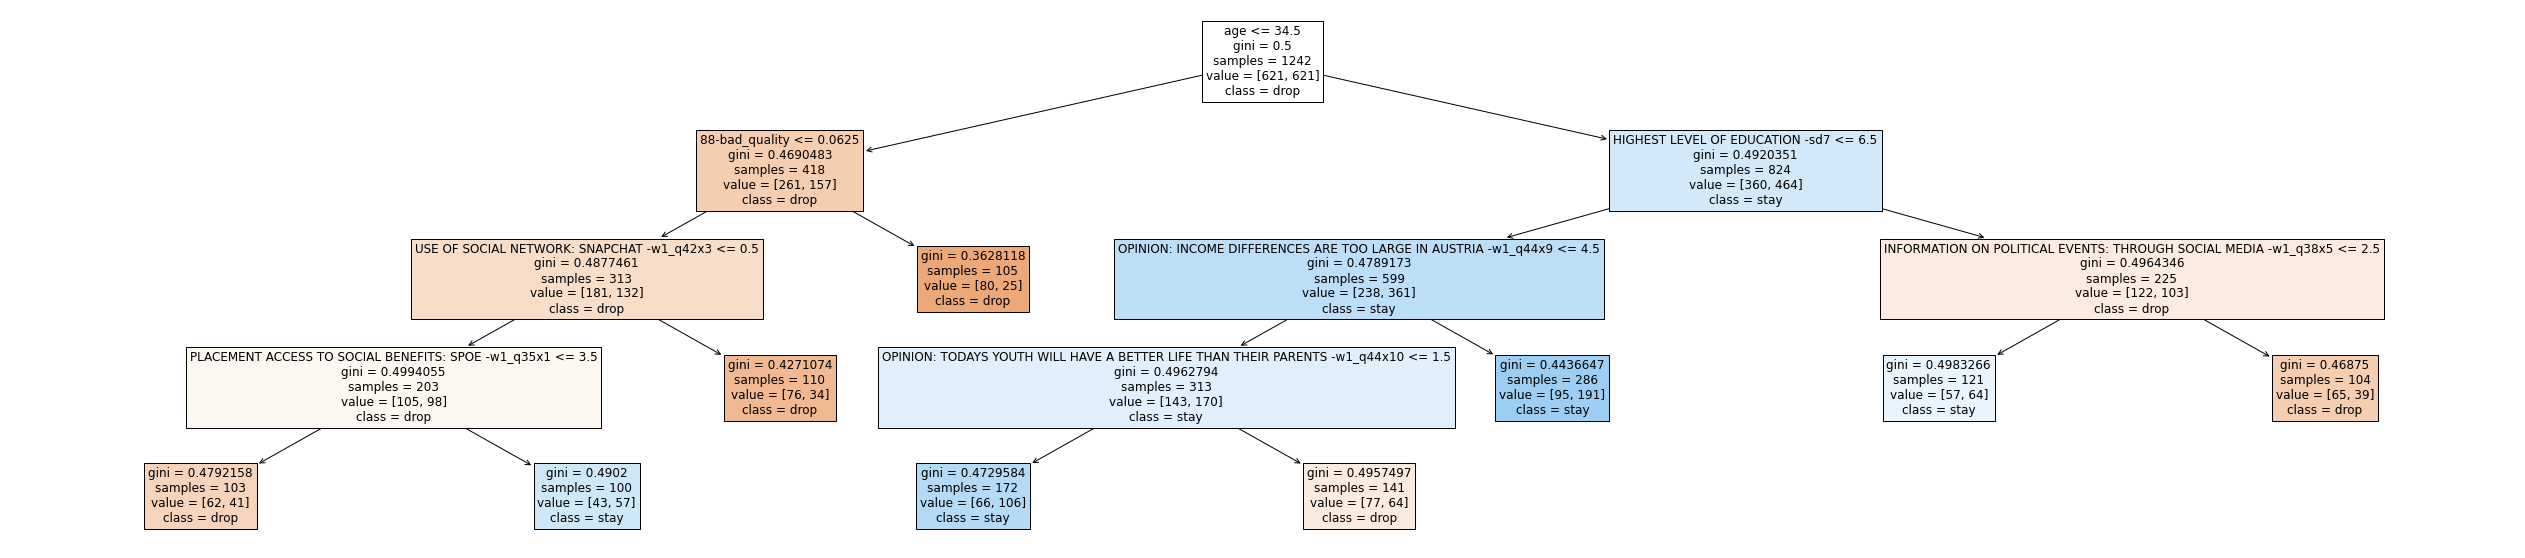

The most important features and its coefficients obtained by logistic regression:
TURNOUT: NATIONAL ELECTION 2013 -w1_q23_I am sure I voted :  0.021
age_group -sd2x2 :  0.021
KNOWLEDGE: SOPHIE KARMASIN -w1_q33x2_OEVP :  0.021
age :  0.02
USE OF SOCIAL NETWORK: SNAPCHAT -w1_q42x3 :  -0.02
USE OF SOCIAL NETWORK: WHATSAPP -w1_q42x4 :  -0.018
OPINION: THE PARTIES ARE THE MAIN PROBLEM IN AUSTRIA -w1_q27x4 :  0.018
MOST COMPETENT PARTY: ENVIRONMENTAL PROTECTION -w1_q46x5_no party :  0.017
KNOWLEDGE_PARLIAMENTARY_THRESHOLD_w1 :  -0.017
IMPORTANT ISSUE: PENSIONS AND OLDAGE INCOME SECURITY -w1_q5x7 :  0.017
MOST COMPETENT PARTY: ENVIRONMENTAL PROTECTION -w1_q46x5_The Greens :  -0.016
MOST COMPETENT PARTY: JOB MARKET AND EMPLOYMENT -w1_q46x1_no party :  0.016
CURRENT PERSONAL SITUATION -sd10_retired :  0.016
KNOWLEDGE: HANS-PETER DOSKOZIL -w1_q33x1_SPOE :  0.016
INFORMATION ON POLITICAL EVENTS: THROUGH SOCIAL MEDIA -w1_q38x5 :  -0.016
MOST COMPETENT PARTY: EUROPEAN INTEGRATION -w1_q46x3_no party

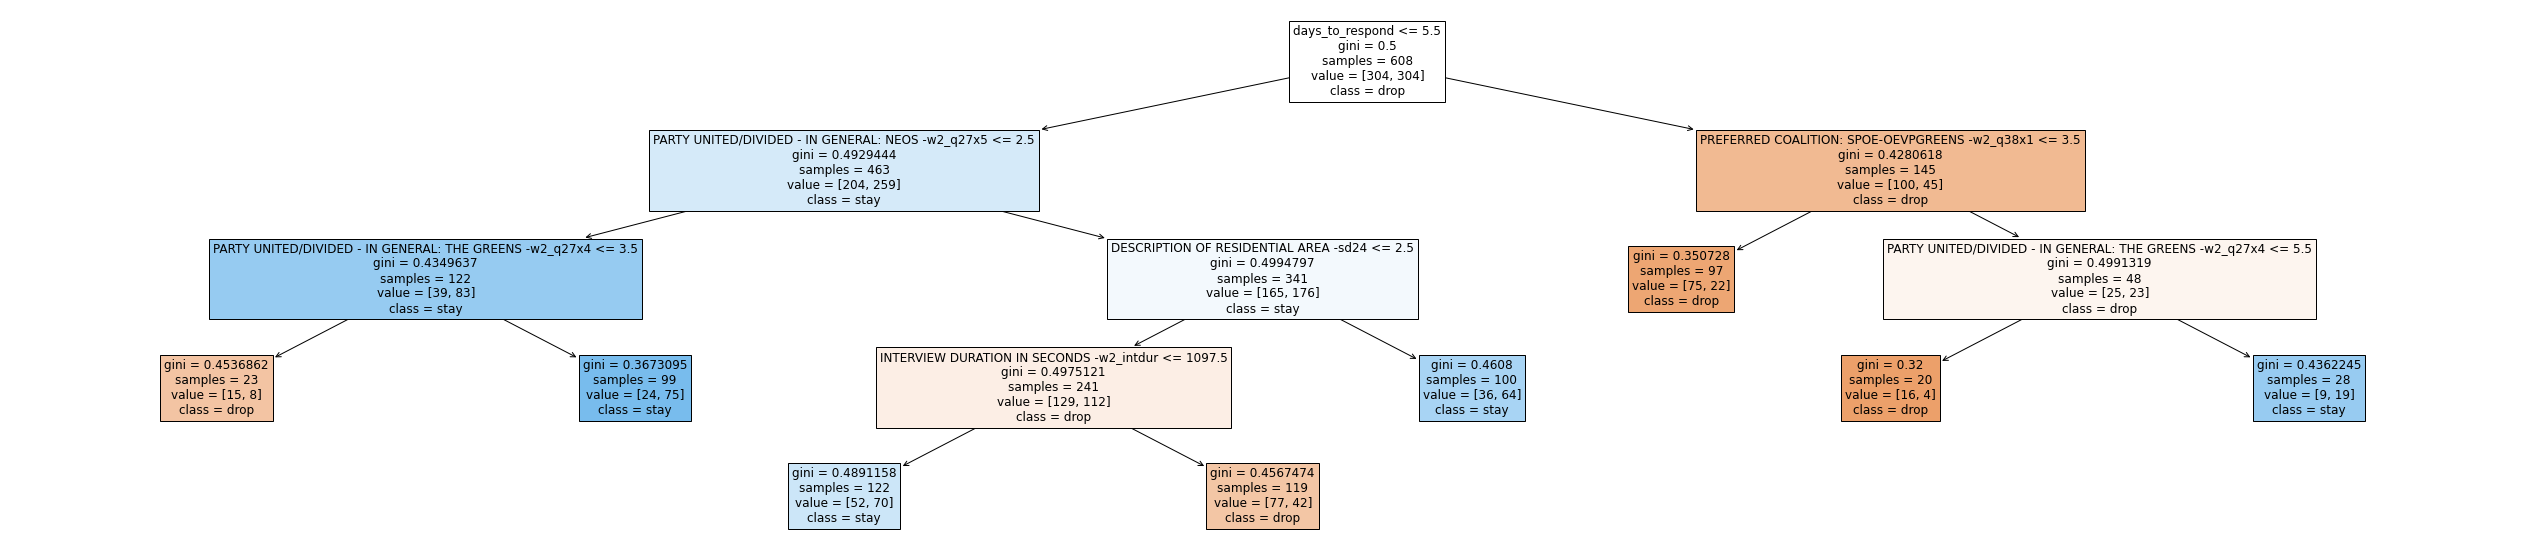

The most important features and its coefficients obtained by logistic regression:
days_to_respond :  -0.098
IMPORTANT ISSUE: HEALTH AND FOSTER CARE -w2_q4x3 :  0.076
READ ELECTION POLLS (LAST WEEK) -w2_q40_no :  -0.075
MOST COMPETENT PARTY: ECONOMIC POLICY -w2_q26x4_OEVP :  -0.053
PARTY ASSOCIATED WITH: ECONOMIC POLICY -w2_q25x4_OEVP :  0.053
PARTY ASSOCIATED WITH: JOB MARKET AND EMPLOYMENT -w2_q25x1_OEVP :  -0.051
PARTY ASSOCIATED WITH: JOB MARKET AND EMPLOYMENT -w2_q25x1_SPOE :  0.051
TOPIC POLIT. DISCUSSION - ELECTIONS AND GOVERNMENT: 2. PERSON -w2_q51x1 :  0.05
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w2_q9x1_on the left wing of his party :  0.049
READ ELECTION POLLS (LAST WEEK) -w2_q40_yes :  0.049
IMPORTANT ISSUE: ASYLUM POLICY -w2_q4x15 :  0.049
POLITICAL DISCUSSION - PARTY PREFERENCE: 2. PERSON -w2_q53_don't know :  -0.048
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  -0.047
POLITICAL DISCUSSION - DIFFERENT OPINION: 1. PERSON -w2_q48 :  -0.046
LEFT-RIGHT PLACEMENT: SEBASTIAN

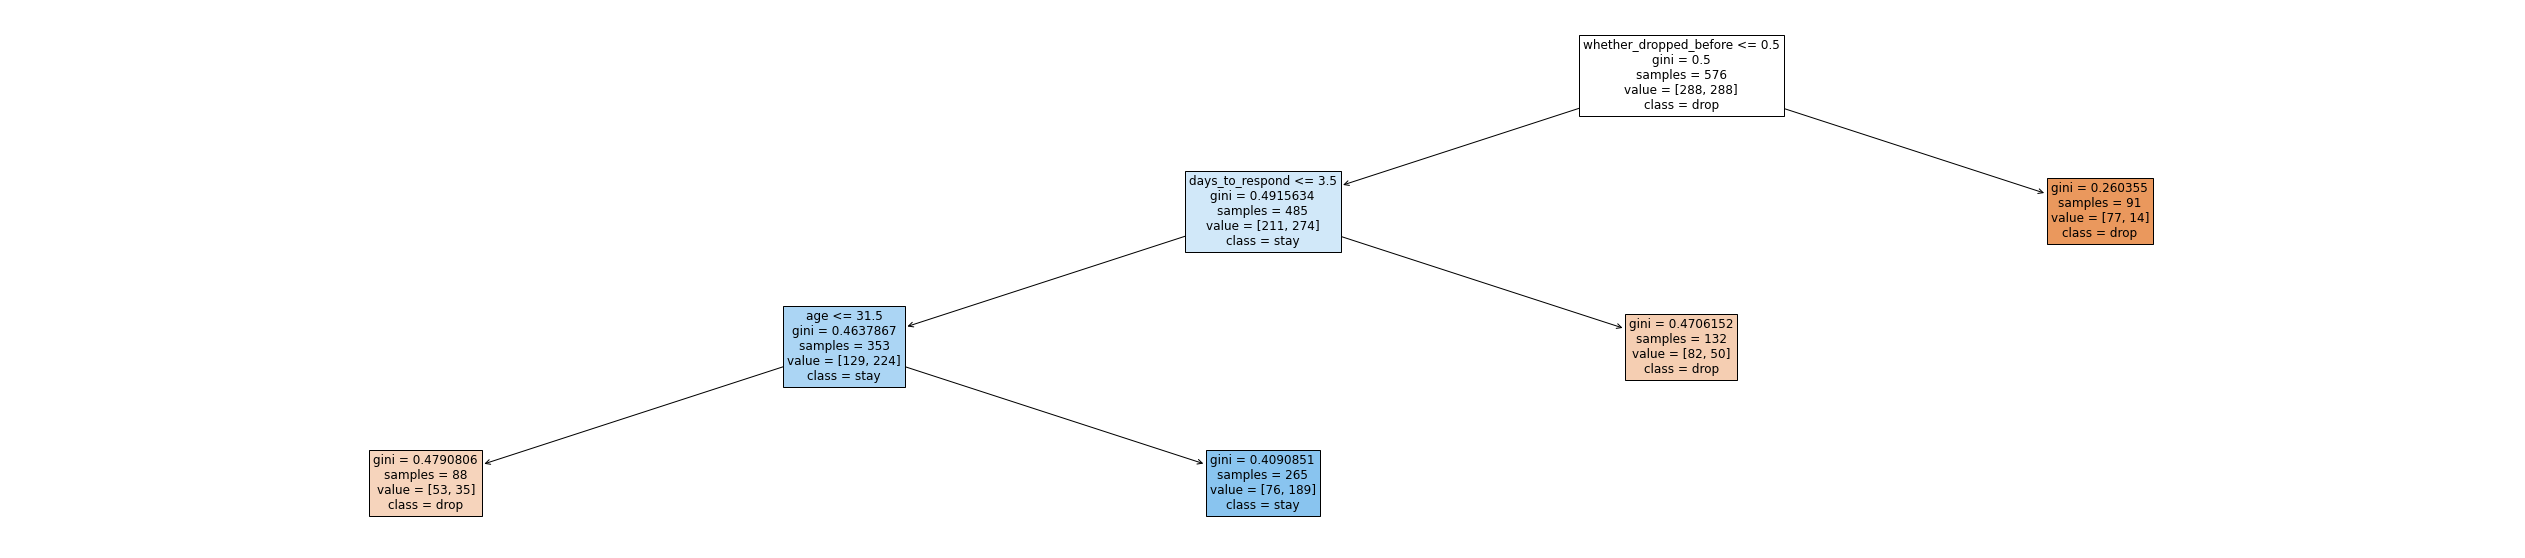

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -1.346
days_to_respond :  -1.207
OPINION: DUTY TO ACCEPT ASYLUM SEEKERS -w3_q24x4 :  -0.937
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w3_q2x1 :  0.722
PARTY ASSOCIATED WITH: ECONOMIC POLICY -w3_q28x4_FPOE :  -0.718
weekendResponse :  -0.687
popnum order :  -0.662
ATTENTIVENESS TO ELECTION CAMPAIGN -w3_q1 :  0.658
OPINION: PEOPLE LIKE ME GET LESS ATTENTION THAN OTHERS -w3_q35x2 :  -0.641
PARTY CHOICE: HYPOTHETICAL -w3_q15_could still change :  0.628
OPINION: THE PARTIES ARE THE MAIN PROBLEM IN AUSTRIA -w3_q19x4 :  0.617
HOUSEHOLD SIZE -sd5 :  -0.616
R. RECEIVED INFORMATION MATERIAL/FREEBIE DURING CAMPAIGN: SPOE -w3_q49x3_1 :  0.591
inconsistency :  -0.589
PREVIOUS TYPE OF OCCUPATION -sd16_public official :  0.582
MOST COMPETENT PARTY: ECONOMIC POLICY -w3_q29x4_SPOE :  -0.579
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN: SPOE -w3_q49x1_1 :  0.571
PARTY ASSOCIATED WI

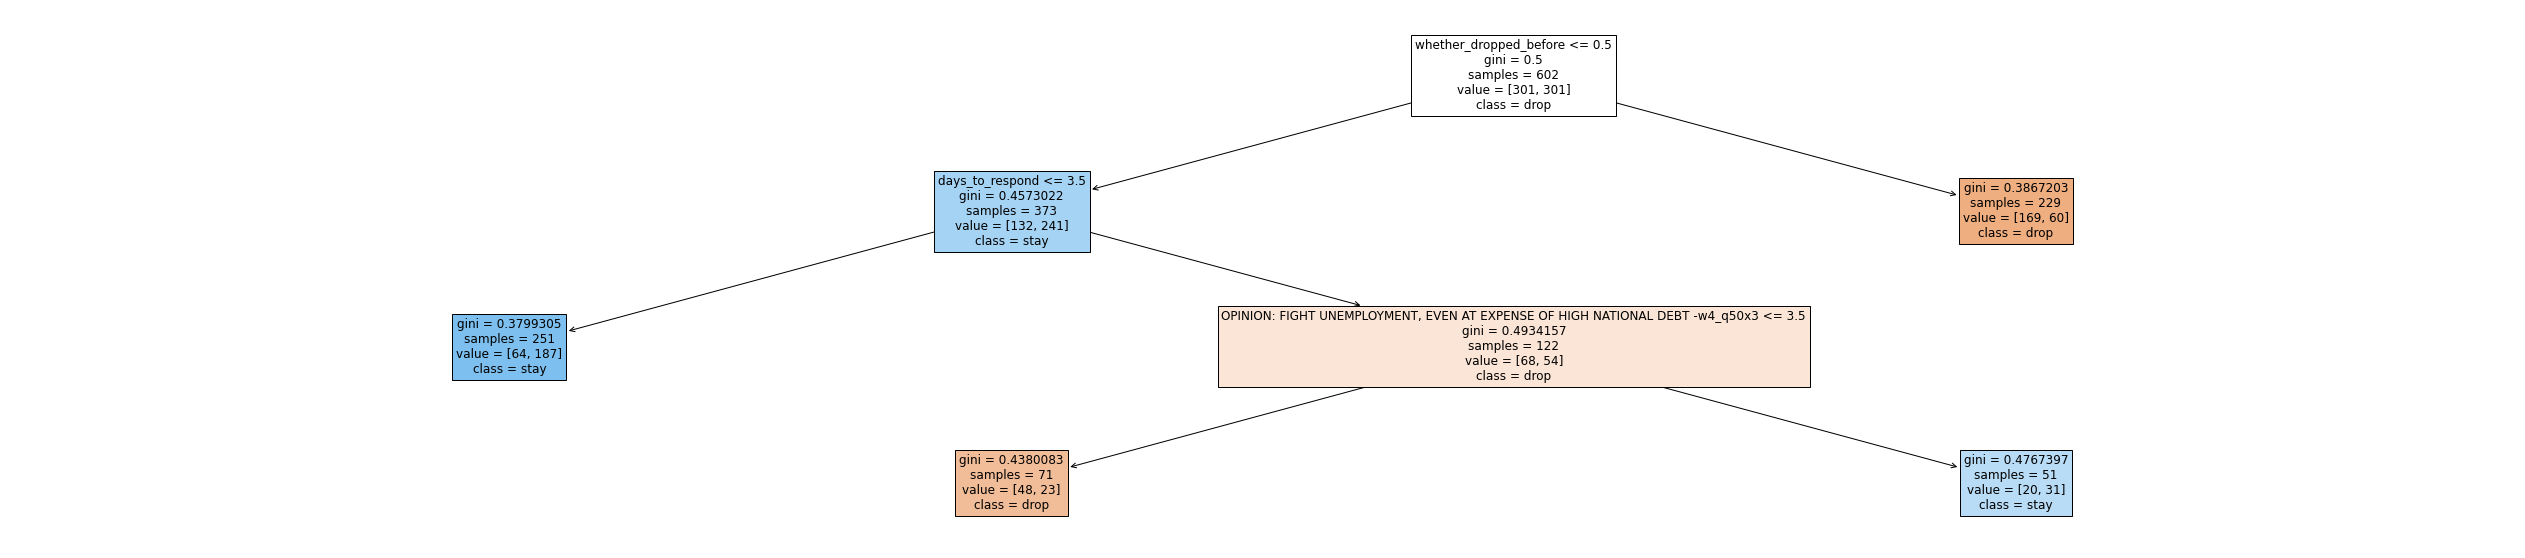

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.857
days_to_respond :  -0.447
POLITICAL INTEREST -w4_q1 :  0.286
dont_know_percentage_mean :  -0.244
RELIGIOUS AFFILIATION -sd8_Protestant church :  -0.224
MOST COMPETENT PARTY: PENSIONS -w4_q33x7_SPOE :  0.222
PARTY ASSOCIATED WITH: EUROPEAN INTEGRATION -w4_q32x3_OEVP :  -0.207
PARTY ASSOCIATED WITH: FIGHTING CORRUPTION -w4_q32x6_List Peter Pilz :  -0.206
GOVERNMENT FORMATION - COALITION PARTNER: LIST SEBASTIAN KURZ -w4_q48x2 :  0.187
GOVERNMENT FORMATION - COALITION PARTNER: NO PARTY -w4_q48x8 :  -0.186
TOPIC POLIT. DISCUSSION - IMMIGRATION, BORDER CONTROLS: 1. PERSON -w4_q80x3 :  -0.179
PARTY ASSOCIATED WITH: PENSIONS -w4_q32x7_SPOE :  0.175
OPINION: VOTING IS A DUTY OF EVERY CITIZEN -w4_q39x1 :  0.174
POLITICAL DISCUSSION - PARTY PREFERENCE: 2. PERSON -w4_q86_The Greens :  0.171
USE OF SOCIAL NETWORK: WHATSAPP -w4_q70x4 :  -0.171
PARTY ASSOCIATED WITH: IMMIGRATION -w4_q32x

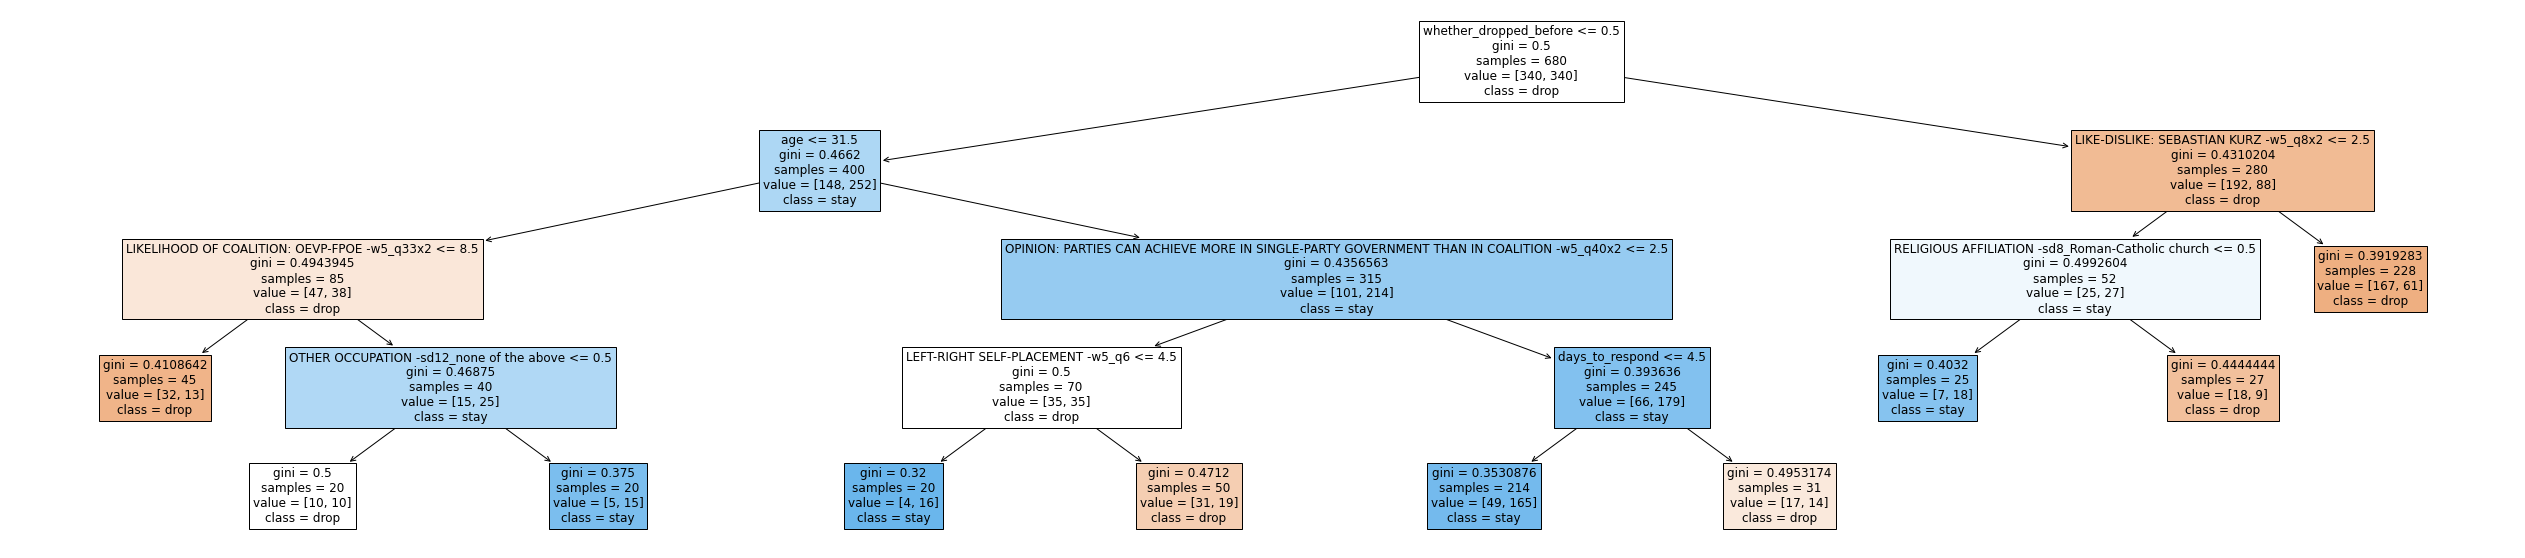

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -1.286
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  -0.947
R. RECEIVED INFORMATION MATERIAL/FREEBIE DURING CAMPAIGN: NEOS -w5_q45x3_5 :  -0.882
GOVERNMENT FORMATION - NO COALITION: REFUSED -w5_q39x9 :  -0.799
R. SAW PARTY CAMPAIGN ADS ON TV: DONT KNOW -w5_q45x6_8 :  -0.792
age :  0.785
R. TALKED TO A PARTY WORKER DURING CAMPAIGN: THE GREENS -w5_q45x4_4 :  0.751
LEFT-RIGHT PLACEMENT CONFIDENT: LIST PETER PILZ -w5_q5x6 :  0.714
LEFT-RIGHT PLACEMENT: SPOE -w5_q4x1 :  0.713
days_to_respond :  -0.687
VOTE CHOICE: NATIONAL ELECTION 2013 -w5_q10_List Peter Pilz :  -0.654
PREFERRED COALITION: SPOE-OEVP -w5_q34x1 :  0.632
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.606
R. VISITED FACEBOOK PAGE DURING CAMPAIGN: OTHER PARTY -w5_q47x2_7 :  0.572
PREFERENCE VOTE: REFUSED -w5_q12x6 :  -0.564
GOVERNMENT FORMATION - COALITION PARTNER: FPOE -w5_q38x3 :  -0.563
R. SAW PARTY CAMPAIGN ADS ON TV: T

In [2]:
waves = ['1', '2', '3', '4', '5']
names = ['drop', 'stay']
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    
    df = concat_df(df, political_data)
    y = df['panelpat']
    dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat', 'id', dte.columns[0]], axis=1)
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_train, y_train = undersample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)
    

## personal and engineered features + gender/age_group interaction

 
WAVE:  1
Personal and engineered features:
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=250)
 


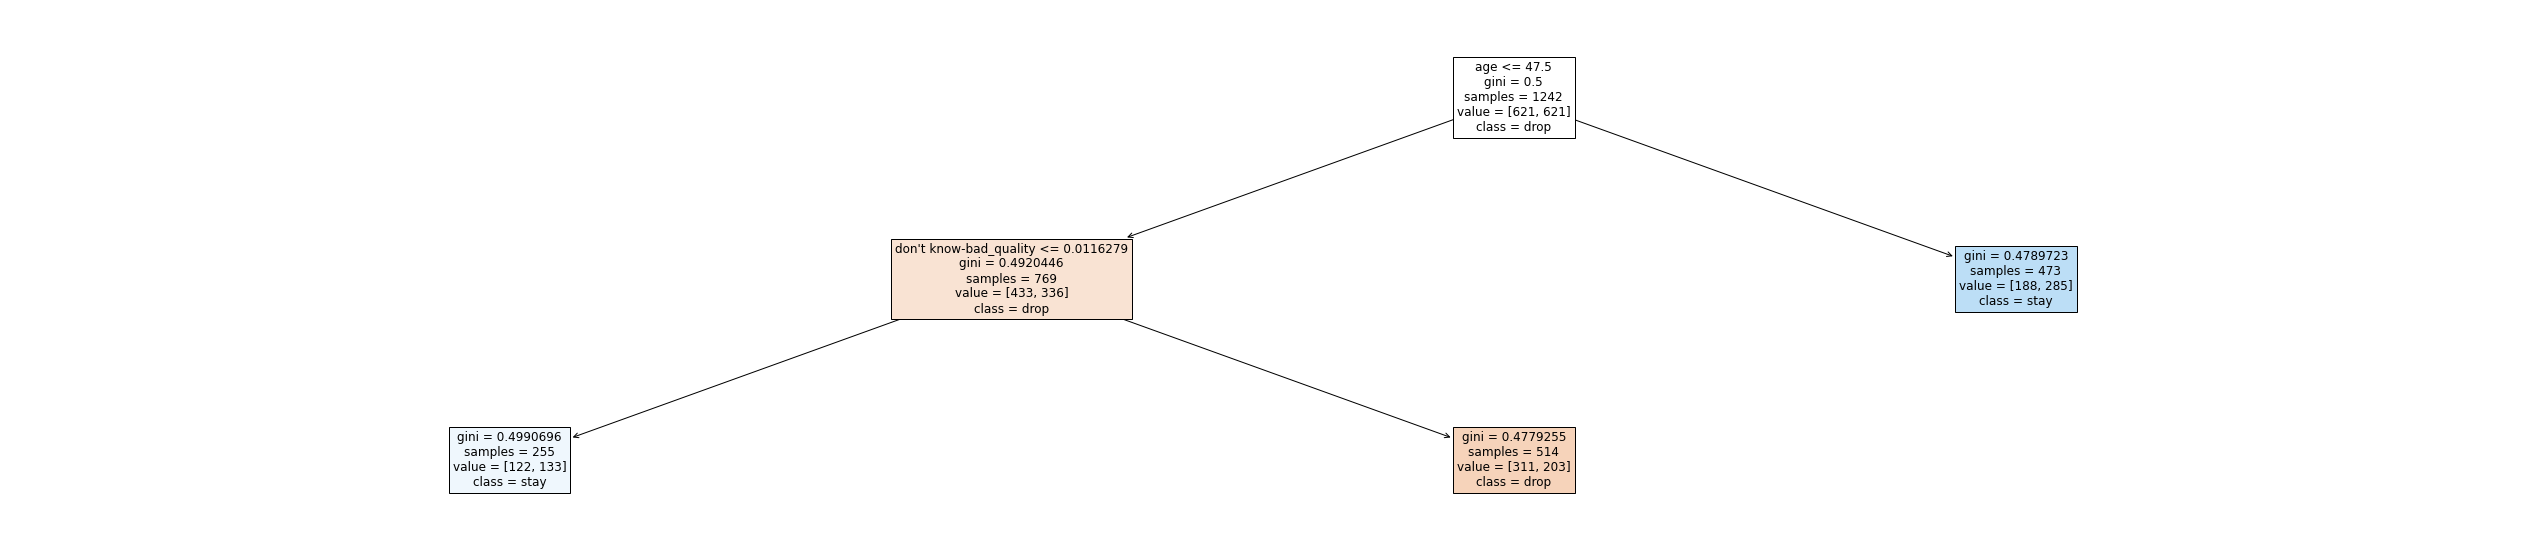

The most important features and its coefficients obtained by logistic regression:
age_group -sd2x2 :  0.123
age :  0.119
CURRENT PERSONAL SITUATION -sd10_retired :  0.083
know_politicians_ratio :  0.063
OTHER OCCUPATION -sd12_none of the above :  0.057
GENDER -sd3_Male :  0.053
HIGHEST LEVEL OF EDUCATION -sd7 :  -0.046
OTHER OCCUPATION -sd12_a student at university :  -0.044
UNION MEMBERSHIP -sd21_no :  0.043
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.042
FEDERAL STATE -sd4_Upper Austria :  -0.038
RELIGIOUS AFFILIATION -sd8_none :  0.038
CURRENT PERSONAL SITUATION -sd10_a student at university :  -0.037
HOUSEHOLD SIZE -sd5 :  -0.035
TYPE OF OCCUPATION -sd14_blue-collar worker :  0.033
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  -0.032
dont_know_percentage_mean :  -0.031
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  -0.031
GENDER -sd3_Female :  -0.03
don't know-bad_quality :  -0.03
voting_age_awareness_w1 :  0.006
whether_dropped_before :  0.0
know_politicians_ratio :  0.063
 

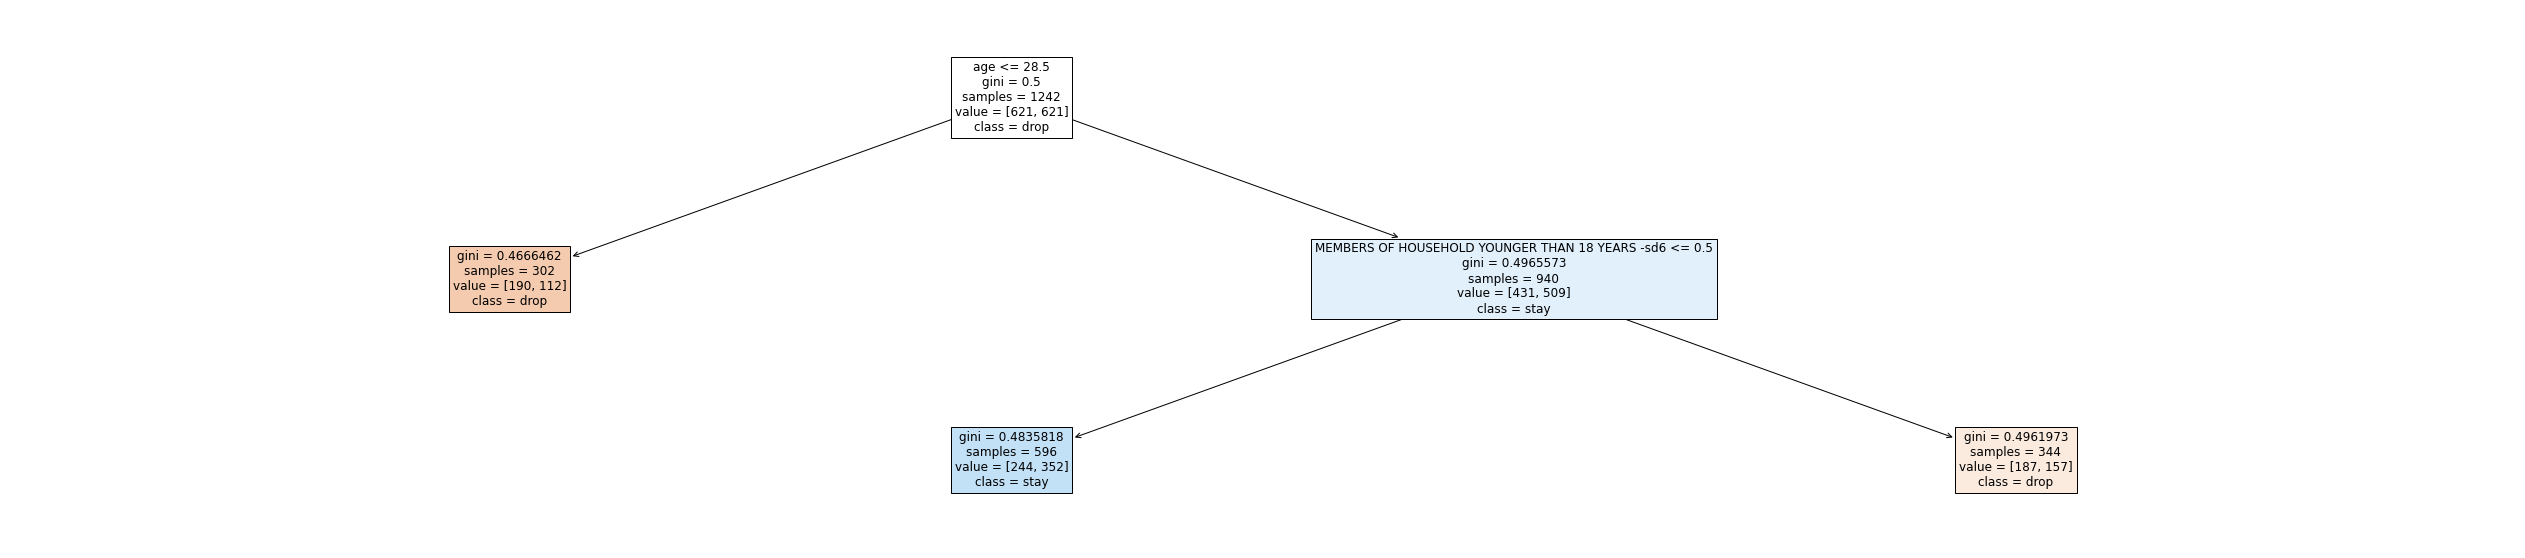

The most important features and its coefficients obtained by logistic regression:
OTHER OCCUPATION -sd12_a student at university :  -0.249
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  -0.227
age :  0.218
HOUSEHOLD SIZE -sd5 :  -0.211
don't know-bad_quality :  -0.203
know_politicians_ratio :  0.194
age_group -sd2x2_Male :  0.193
TYPE OF OCCUPATION -sd14_public official :  -0.183
TYPE OF OCCUPATION -sd14_blue-collar worker :  0.172
TYPE OF OCCUPATION -sd14_self-employed with employees :  0.162
1.0 :  -0.154
Country of birth, father -sd20_Poland, Slovenia, Czech Republic, Hungary :  -0.149
CURRENT PERSONAL SITUATION -sd10_retired :  0.149
OTHER OCCUPATION -sd12_none of the above :  0.14
4.0 :  0.137
weekendResponse :  -0.135
inconsistency :  -0.134
0.0 :  -0.134
Country of birth, father -sd20_Austria :  0.13
FEDERAL STATE -sd4_Lower Austria :  -0.13
voting_age_awareness_w1 :  0.027
whether_dropped_before :  0.0
know_politicians_ratio :  0.194
 
WAVE:  2
Personal and engineered featu

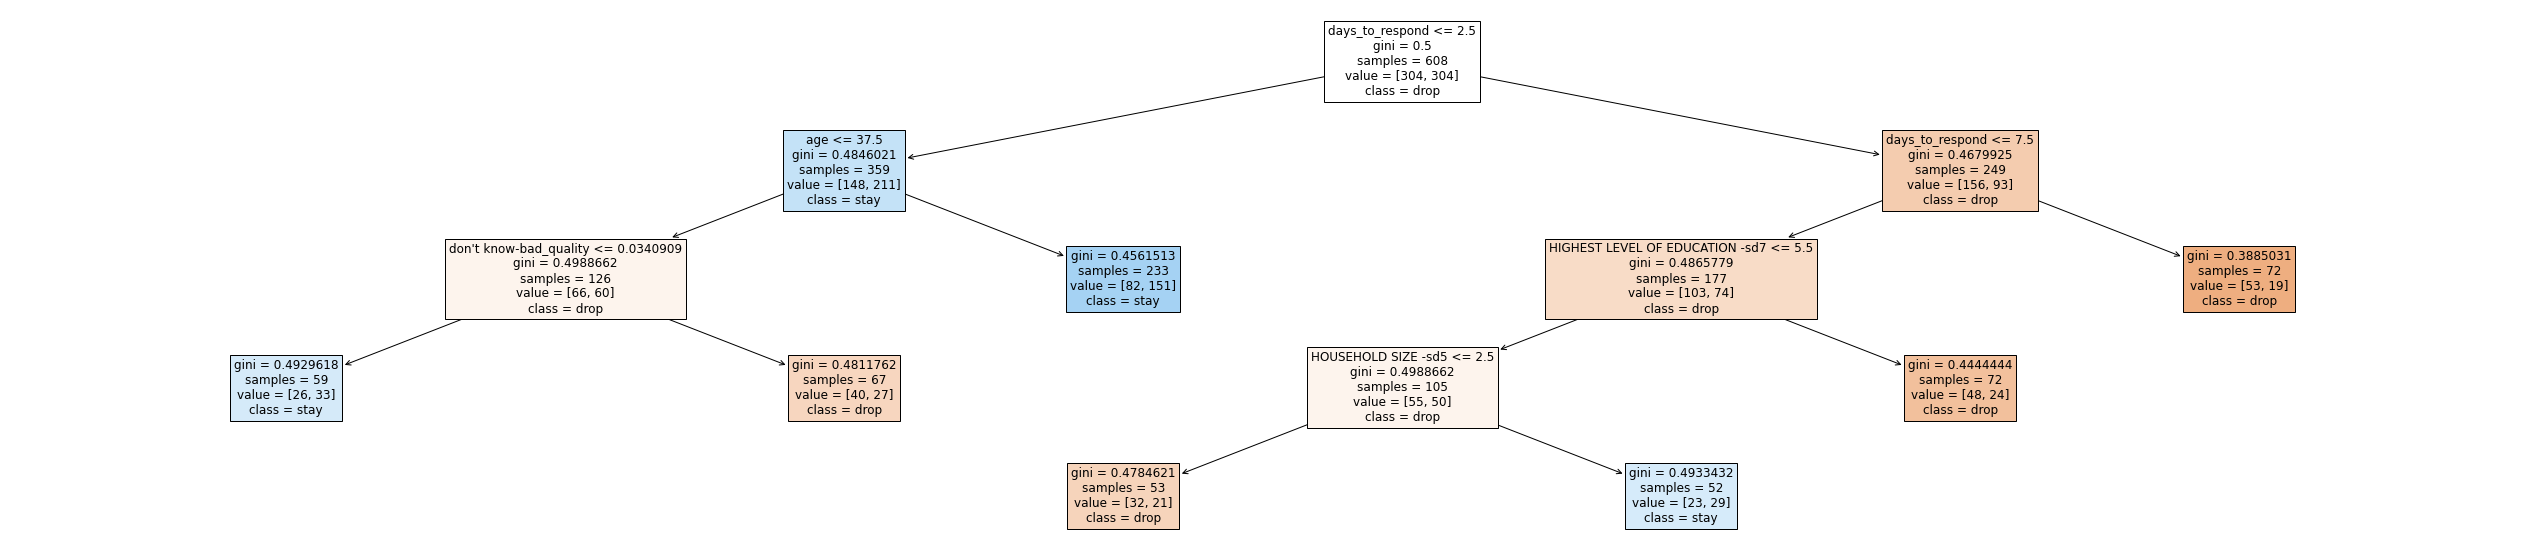

The most important features and its coefficients obtained by logistic regression:
days_to_respond :  -1.807
PREVIOUS TYPE OF OCCUPATION -sd16_self-employed with employees :  -1.529
CURRENT PERSONAL SITUATION -sd10_employed :  1.479
Country of birth, father -sd20_Bosnia, Croatia, Serbia :  1.375
TYPE OF OCCUPATION -sd14_self-employed with employees :  -1.345
Country of birth, mother -sd19_Bosnia, Croatia, Serbia :  -1.096
OTHER OCCUPATION -sd12_a student at school :  1.092
age_group -sd2x2 :  1.081
Country of birth, father -sd20_Germany :  -1.077
other party-bad_quality :  -1.019
ADDITIONAL OCCUPATION -sd13_help out in a family firm :  -0.988
don't know-bad_quality :  -0.987
CURRENT PERSONAL SITUATION -sd10_other training :  -0.967
OTHER OCCUPATION -sd12_on leave :  -0.923
CURRENT PERSONAL SITUATION -sd10_unfit for work :  0.918
JOB SITUATION -sd11 :  -0.9
Country of birth, mother -sd19_Austria :  0.874
RELIGIOUS AFFILIATION -sd8_other :  0.828
ADDITIONAL OCCUPATION -sd13_in vocational 

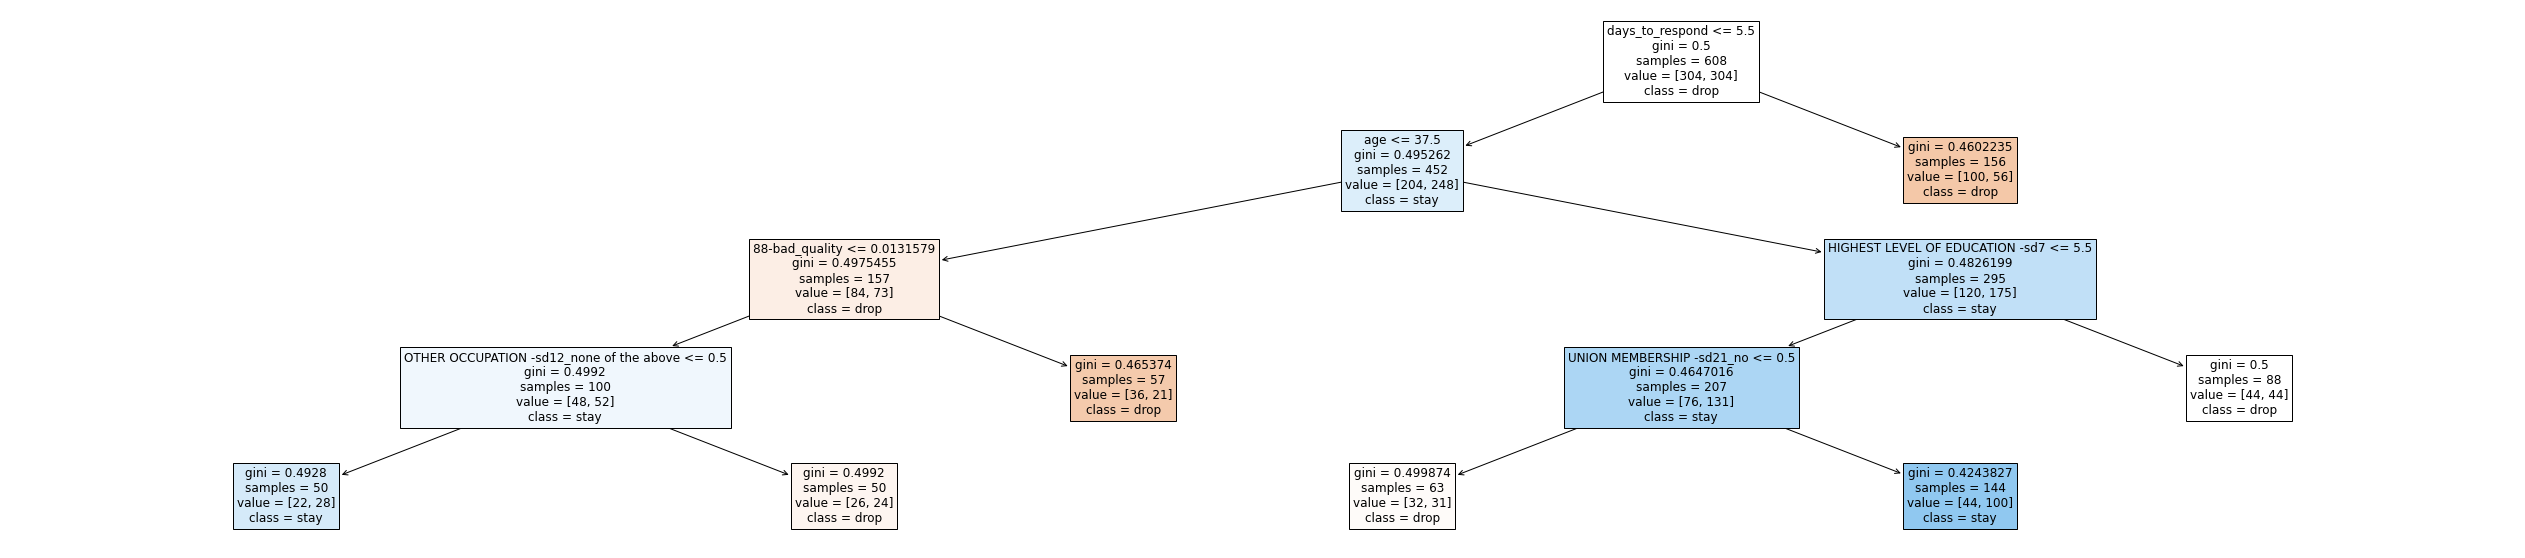

The most important features and its coefficients obtained by logistic regression:
days_to_respond :  -0.086
TYPE OF OCCUPATION -sd14_employee :  -0.063
1.0 :  -0.061
TYPE OF OCCUPATION -sd14_self-employed without employees :  0.055
3.0 :  0.053
UNION MEMBERSHIP -sd21_no :  0.046
age_group -sd2x2_Female :  0.035
ADDITIONAL OCCUPATION -sd13_no :  0.034
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.031
don't know-bad_quality :  -0.031
UNION MEMBERSHIP -sd21_yes :  -0.027
FEDERAL STATE -sd4_Upper Austria :  -0.027
CURRENT PERSONAL SITUATION -sd10_retired :  0.022
age :  0.022
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  -0.021
FEDERAL STATE -sd4_Vienna :  0.02
UNION MEMBERSHIP -sd21_don't know :  -0.019
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  0.019
JOB SITUATION -sd11 :  -0.018
TYPE OF OCCUPATION -sd14_self-employed with employees :  -0.018
whether_dropped_before :  0.0
know_politicians_ratio :  0.0
 
WAVE:  3
Personal and engineered features:
Counter({1: 2338, 0: 360})
Decisi

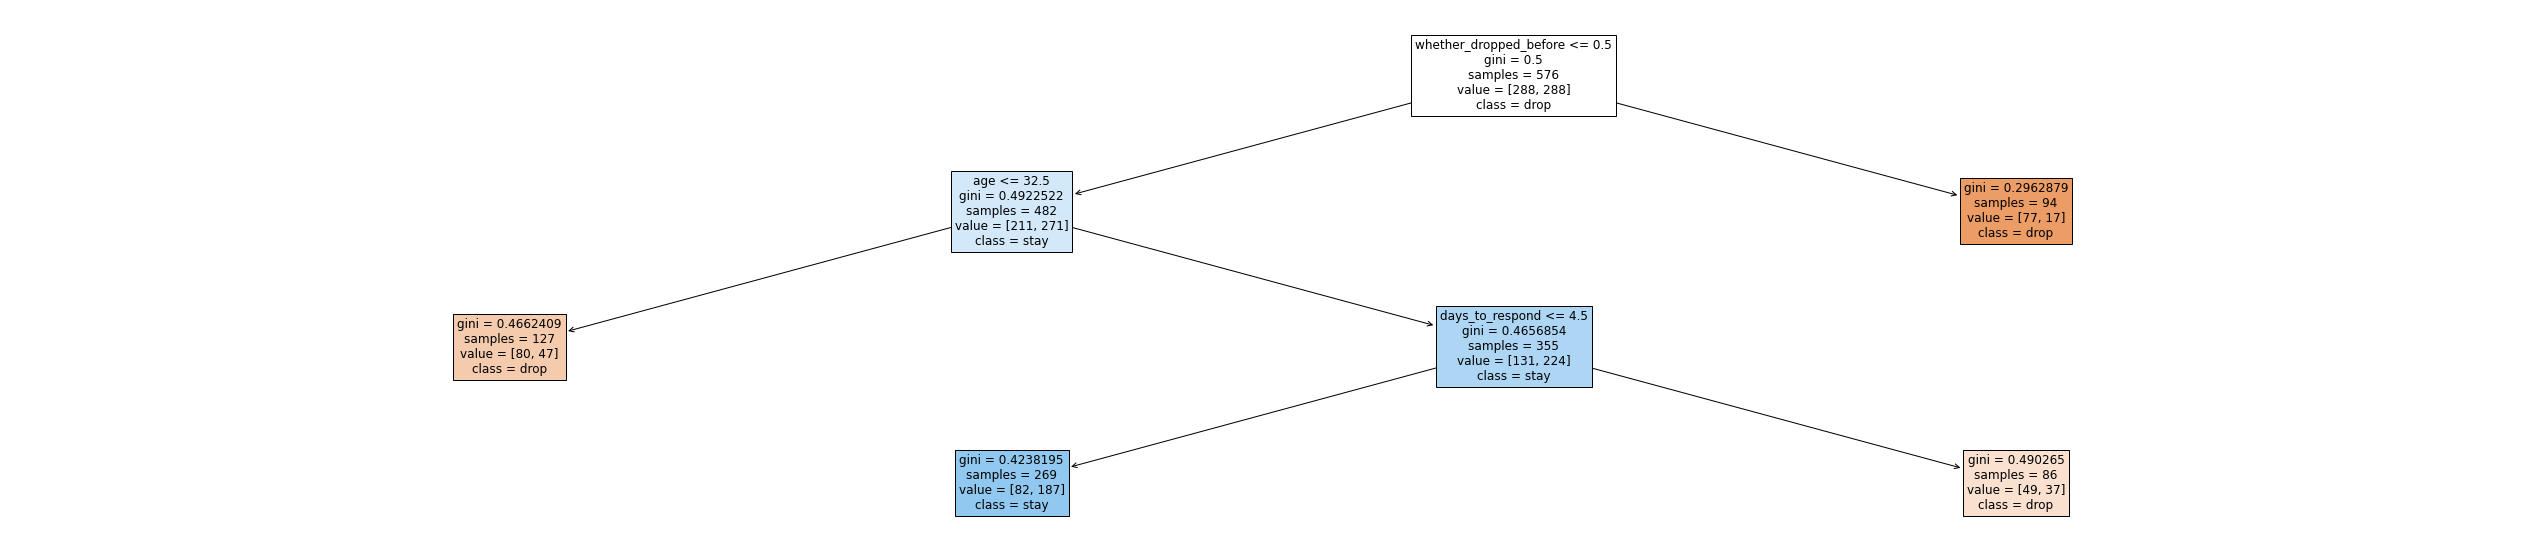

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -1.367
days_to_respond :  -0.912
age_group -sd2x2 :  0.758
HOUSEHOLD SIZE -sd5 :  -0.677
FEDERAL STATE -sd4_Carinthia :  0.605
age :  0.602
CURRENT PERSONAL SITUATION -sd10_employed :  0.536
dont_know_percentage_mean :  -0.534
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.501
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  -0.449
TYPE OF OCCUPATION -sd14_blue-collar worker :  -0.447
77-bad_quality :  0.432
CURRENT PERSONAL SITUATION -sd10_retired :  -0.427
UNION MEMBERSHIP -sd21_no :  0.414
OTHER OCCUPATION -sd12_none of the above :  0.412
popnum order :  -0.366
FEDERAL STATE -sd4_Upper Austria :  0.335
PREVIOUS TYPE OF OCCUPATION -sd16_employee :  0.33
FEDERAL STATE -sd4_Styria :  -0.316
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  0.309
whether_dropped_before :  -1.367
know_politicians_ratio :  0.0
 
Personal and engineered features + gender/age_group interac

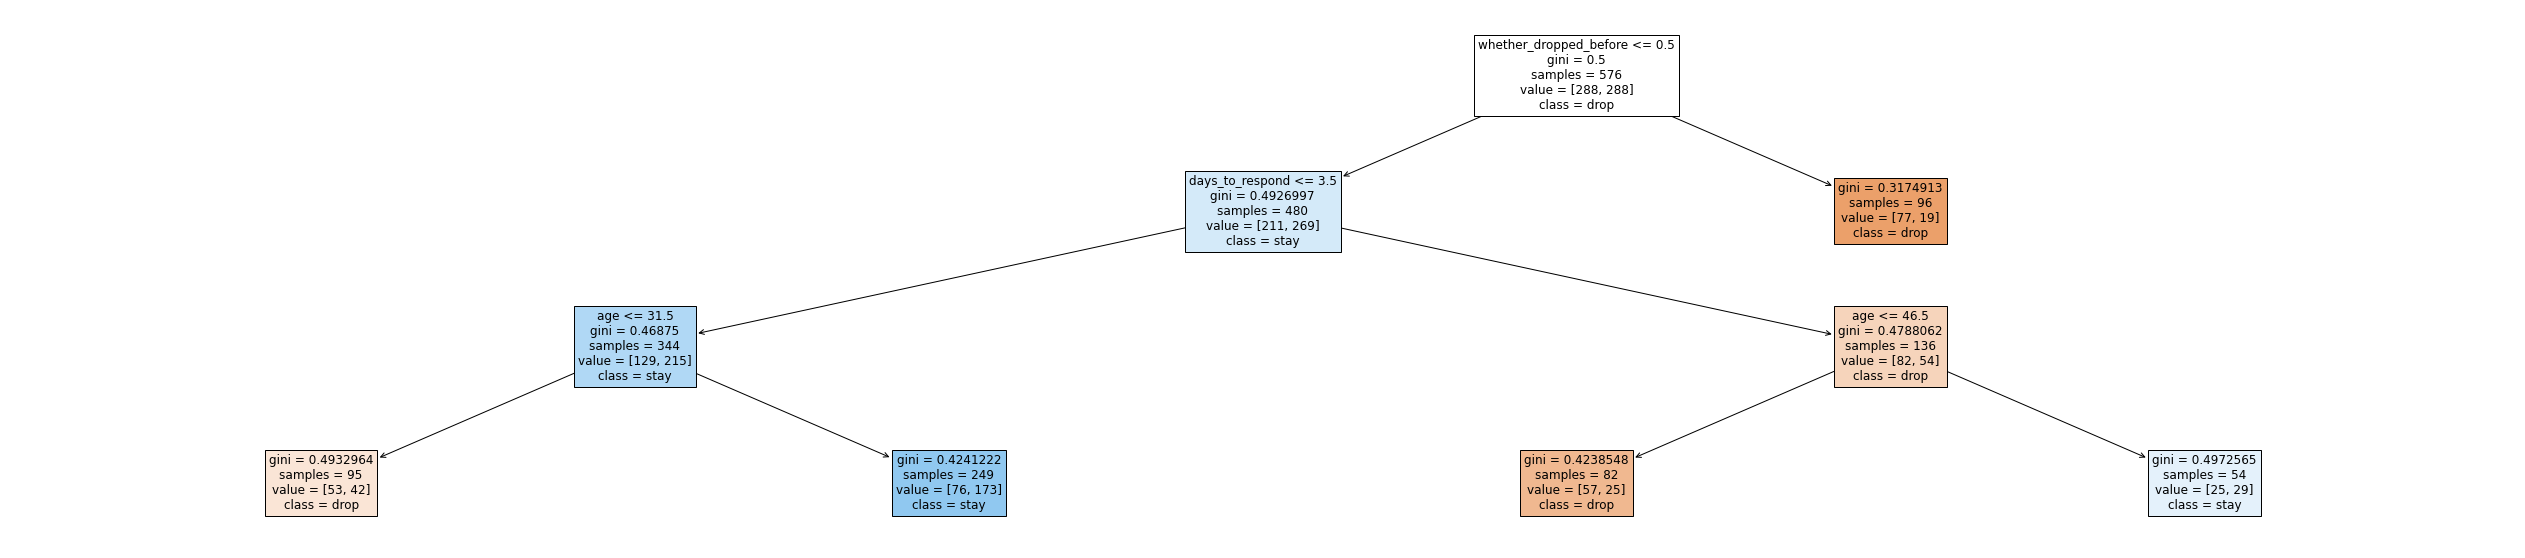

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -1.228
days_to_respond :  -0.863
OTHER OCCUPATION -sd12_a student at university :  -0.62
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.517
CURRENT PERSONAL SITUATION -sd10_unfit for work :  -0.498
UNION MEMBERSHIP -sd21_no :  0.489
PREVIOUS TYPE OF OCCUPATION -sd16_public official :  0.483
other-bad_quality :  -0.434
ADDITIONAL OCCUPATION -sd13_help out in a family firm :  0.433
other party-bad_quality :  0.427
CURRENT PERSONAL SITUATION -sd10_employed :  0.417
UNION MEMBERSHIP -sd21_don't know :  -0.407
Country of birth, mother -sd19_Austria :  -0.393
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  -0.388
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  -0.377
same_agree_resp :  0.376
Country of birth, repondent -sd18_Germany :  0.373
inconsistency :  -0.365
weekendResponse :  -0.359
age :  0.358
whether_dropped_before :  -1.228
know_politicians_ratio :  0.0
 
WAVE

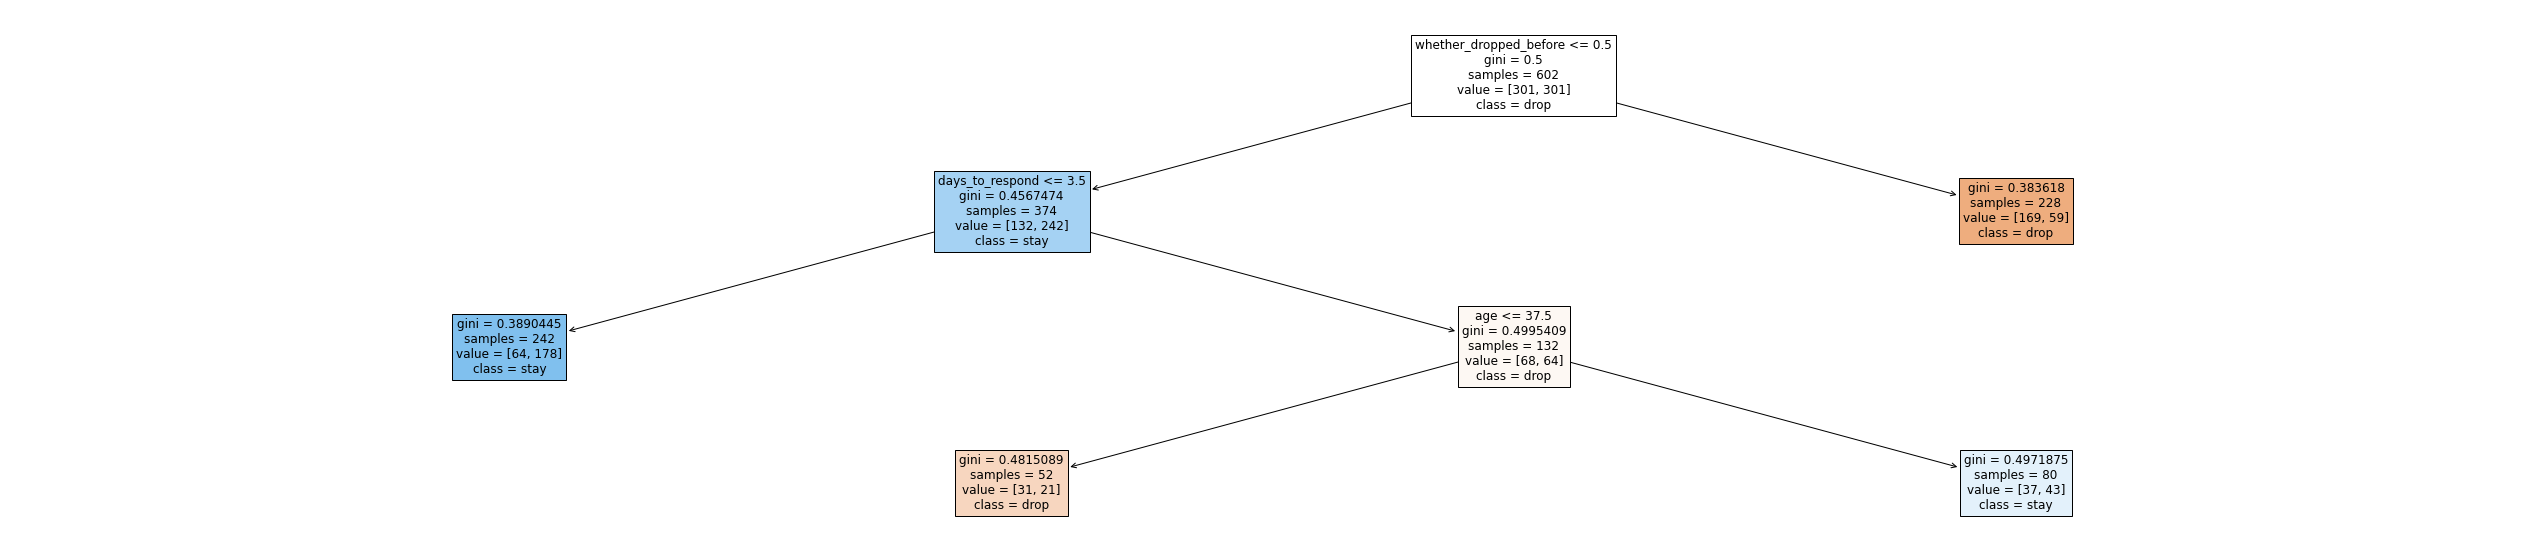

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -1.464
days_to_respond :  -1.217
inconsistency :  -0.818
ADDITIONAL OCCUPATION -sd13_more than 35h weekly :  0.781
Country of birth, father -sd20_Poland, Slovenia, Czech Republic, Hungary :  -0.737
political_interest :  0.689
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  0.662
Country of birth, father -sd20_Germany :  0.654
HOUSEHOLD SIZE -sd5 :  0.606
CURRENT PERSONAL SITUATION -sd10_unemployed or seeking for work :  0.575
CURRENT PERSONAL SITUATION -sd10_unfit for work :  0.534
ADDITIONAL OCCUPATION -sd13_15 - 35h weekly :  -0.531
CURRENT PERSONAL SITUATION -sd10_a student at school :  -0.523
RELIGIOUS AFFILIATION -sd8_Protestant church :  -0.508
CURRENT PERSONAL SITUATION -sd10_other training :  -0.488
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  0.478
TYPE OF OCCUPATION -sd14_freelance worker :  -0.469
OTHER OCCUPATION -sd12_other training :  -0.442
TYPE OF OCCUPATION -

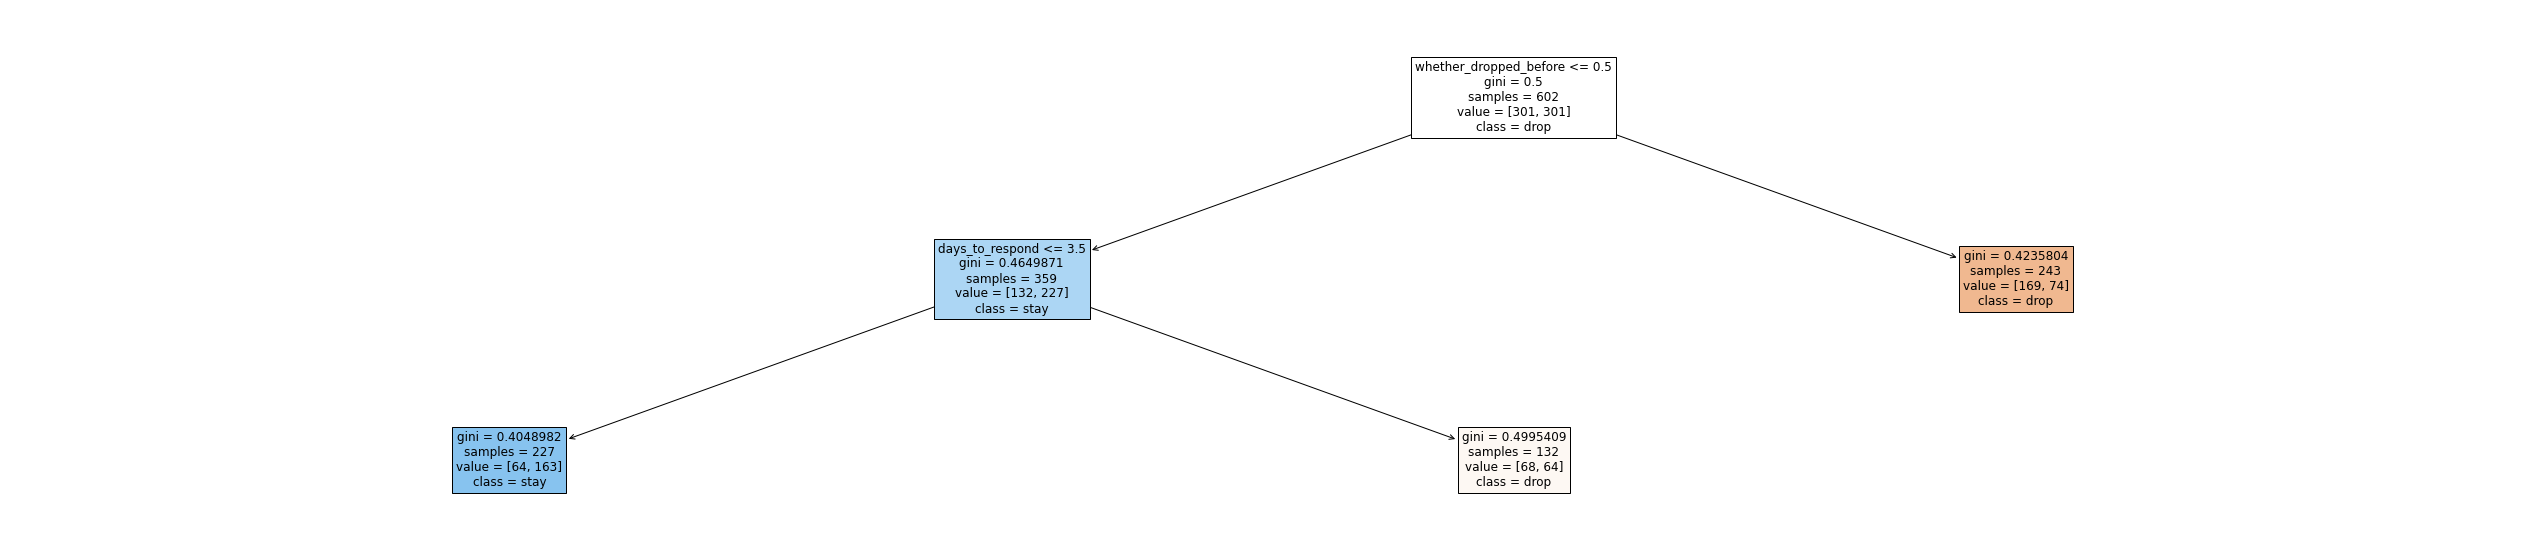

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.222
days_to_respond :  -0.083
dont_know_percentage_mean :  -0.066
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  0.057
RELIGIOUS AFFILIATION -sd8_none :  0.055
age_group -sd2x2_Male :  0.055
FEDERAL STATE -sd4_Vienna :  0.051
TYPE OF OCCUPATION -sd14_employee :  -0.05
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.047
3.0 :  0.045
age_group -sd2x2_Female :  -0.033
OTHER OCCUPATION -sd12_none of the above :  -0.029
popnum order :  0.027
ADDITIONAL OCCUPATION -sd13_no :  0.027
4.0 :  -0.026
1.0 :  -0.025
CURRENT PERSONAL SITUATION -sd10_unemployed or seeking for work :  0.025
0.0 :  -0.025
FEDERAL STATE -sd4_Vorarlberg :  -0.025
RELIGIOUS AFFILIATION -sd8_Protestant church :  -0.024
whether_dropped_before :  -0.222
know_politicians_ratio :  0.002
 
WAVE:  5
Personal and engineered features:
Counter({1: 2308, 0: 425})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
   

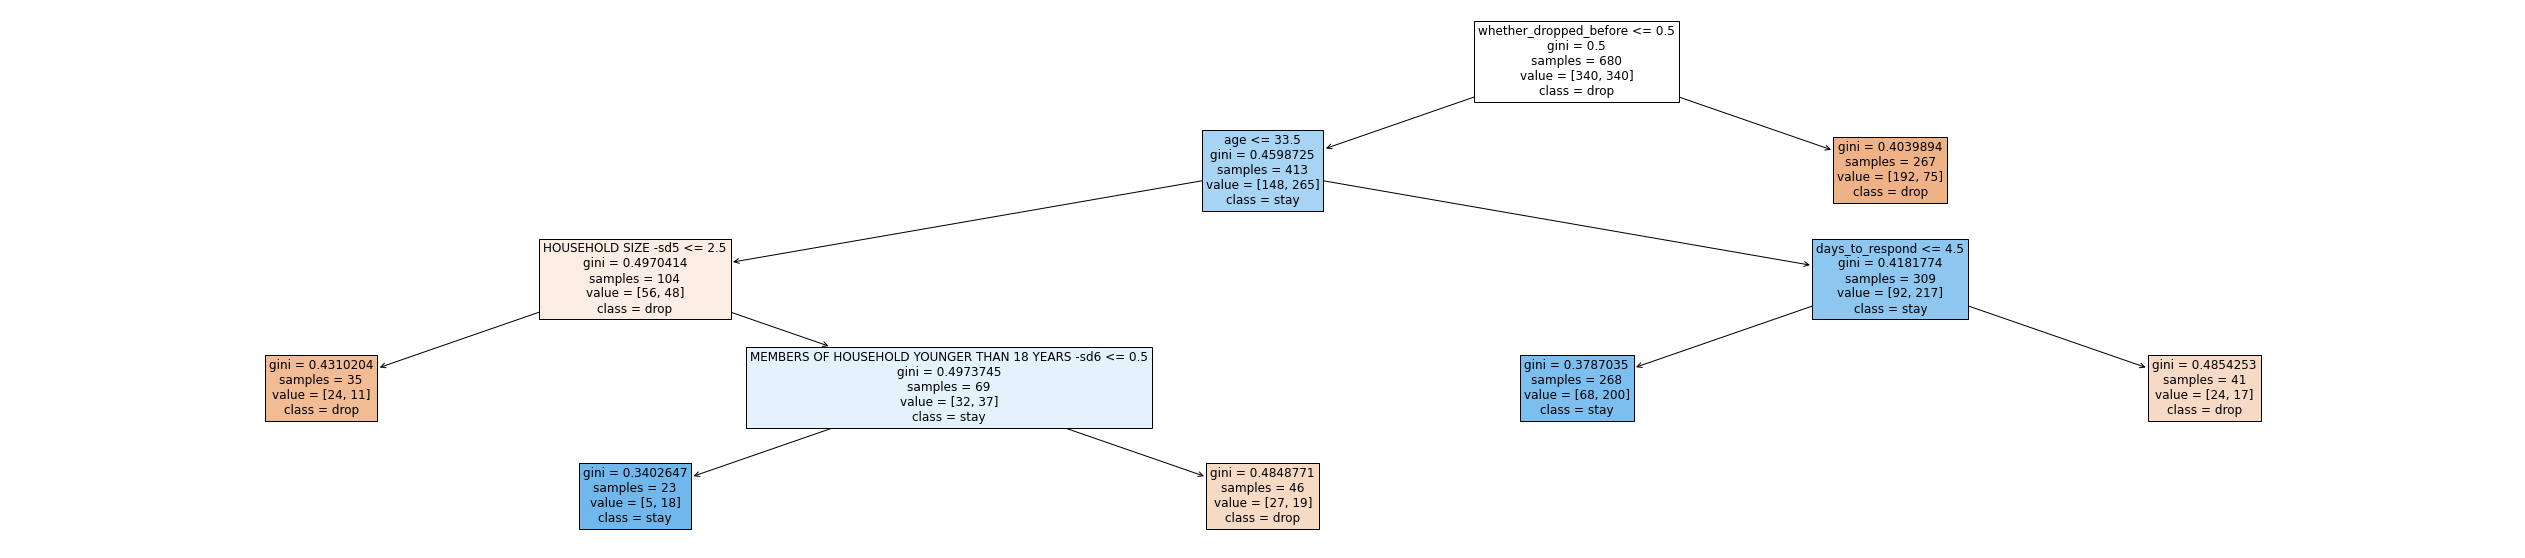

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.849
days_to_respond :  -0.448
age_group -sd2x2 :  0.35
age :  0.337
dont_know_percentage_mean :  -0.203
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  -0.183
HIGHEST LEVEL OF EDUCATION -sd7 :  0.175
Country of birth, mother -sd19_Germany :  0.172
RELIGIOUS AFFILIATION -sd8_none :  0.153
weekendResponse :  -0.151
FEDERAL STATE -sd4_Lower Austria :  0.147
RELIGIOUS AFFILIATION -sd8_other :  -0.135
inconsistency :  -0.126
TYPE OF OCCUPATION -sd14_public official :  0.122
ADDITIONAL OCCUPATION -sd13_15 - 35h weekly :  -0.116
FEDERAL STATE -sd4_Vorarlberg :  -0.101
INCOME SITUATION -sd22 :  0.1
Country of birth, repondent -sd18_Austria :  -0.1
OTHER OCCUPATION -sd12_none of the above :  0.093
77-bad_quality :  -0.089
whether_dropped_before :  -0.849
know_politicians_ratio :  0.0
 
Personal and engineered features + gender/age_group interaction
DecisionTreeClassifier(class_weight='balance

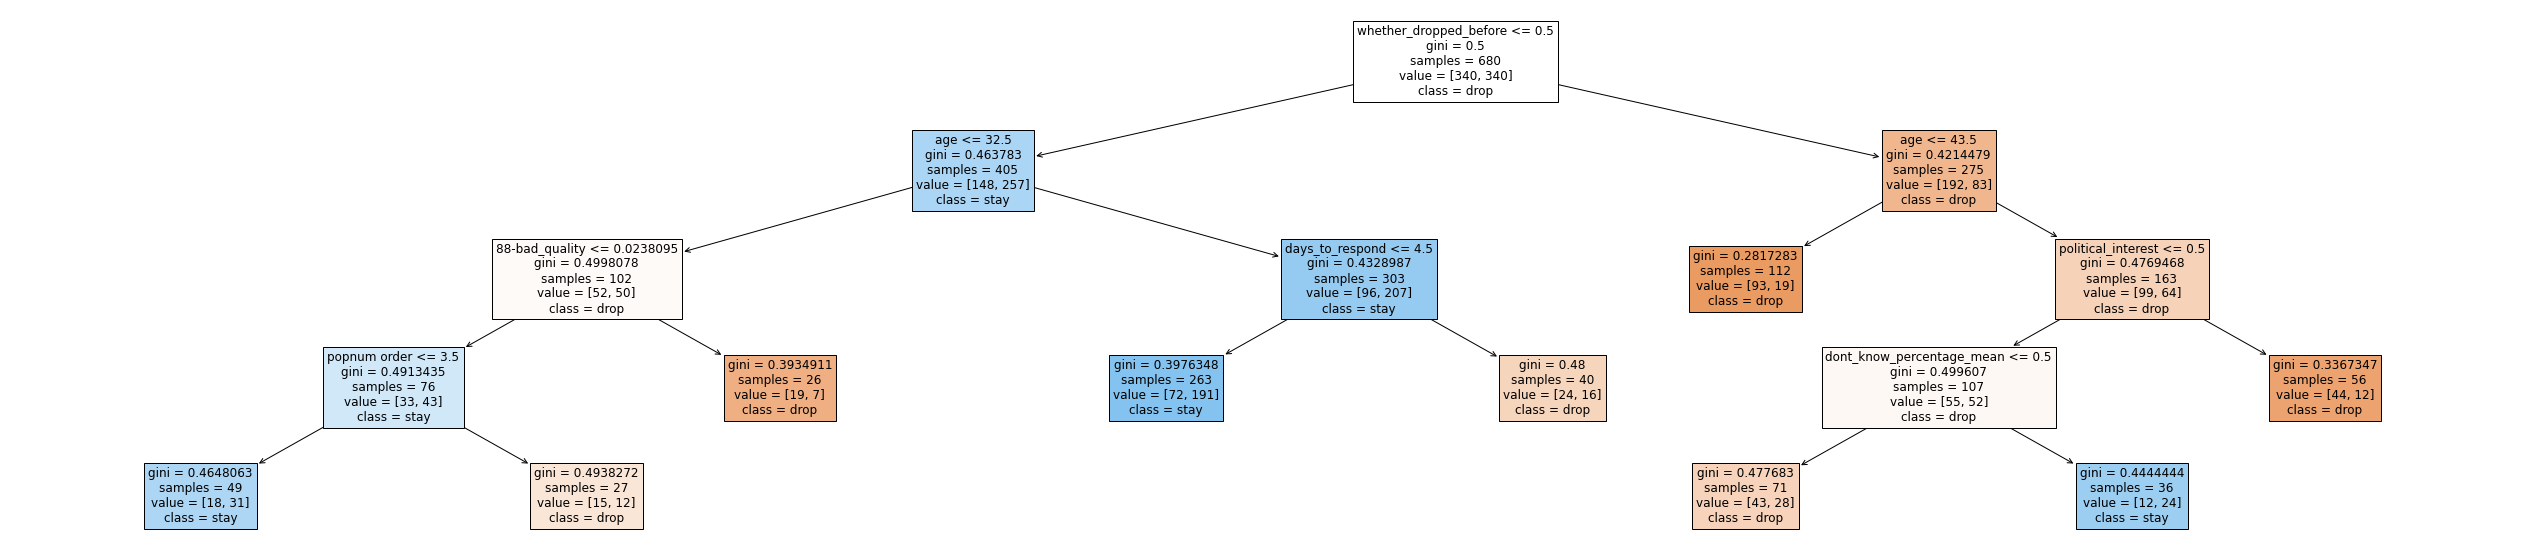

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.825
days_to_respond :  -0.352
1.0 :  -0.328
age :  0.232
RELIGIOUS AFFILIATION -sd8_other :  -0.167
4.0 :  0.165
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  -0.153
FEDERAL STATE -sd4_Lower Austria :  0.136
EVER EMPLOYMENT -sd15_no, neither :  -0.128
PREVIOUS TYPE OF OCCUPATION -sd16_employee :  0.124
CURRENT PERSONAL SITUATION -sd10_on leave :  -0.12
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.119
political_interest :  -0.118
TYPE OF OCCUPATION -sd14_freelance worker :  0.118
ADDITIONAL OCCUPATION -sd13_less than 15h weekly :  -0.114
OTHER OCCUPATION -sd12_none of the above :  0.109
0.0 :  0.106
CURRENT PERSONAL SITUATION -sd10_unemployed or seeking for work :  0.099
Country of birth, mother -sd19_Germany :  0.095
TYPE OF OCCUPATION -sd14_civil servant :  -0.09
whether_dropped_before :  -0.825
know_politicians_ratio :  0.0


In [3]:
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    
    engineered = political_data.filter(regex='whether_dropped_before|inconsistency|bad_quality|weekend|know_politicians_ratio|same_agree_resp|political_interest|responded|dont_know_percentage_mean|days_to_respond')
    y = df['panelpat']
    #dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat'], axis=1) #, dte.columns[0]
    X = pd.concat([X, engineered], axis=1)
    cols = X.columns
    print(' ')
    
    print('WAVE: ', wave)
    print('Personal and engineered features:')
    print(Counter(y))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_train, y_train = undersample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)    
    
    age_dummies = X['age_group -sd2x2']
    age_dummies = pd.get_dummies(age_dummies, columns=['age_group -sd2x2'], dummy_na=True, prefix_sep='_')
    # https://stackoverflow.com/questions/42969545/interactions-between-dummies-variables-in-python
    gender = X.columns[X.columns.str.startswith('GENDER')]
    X = pd.concat([X, age_dummies], axis=1)
    age_group = X.filter(like='age_group', axis=1)

    for col1 in gender:
        for col2 in age_group:
            X[col2 + '_' + col1.split('_')[1]] = X[col1].mul(X[col2])
        
    for i in age_group:
        X = X.drop(i, axis=1)
    for i in gender:
        X = X.drop(i, axis=1)
    
    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_train, y_train = undersample.fit_resample(X_train, y_train)
    print(' ')
    print('Personal and engineered features + gender/age_group interaction')
    analysis_all_models(X_train, y_train, X_test, y_test, names)    

## X - only personal features, y - panelpat

 
WAVE:  1
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=250)
 


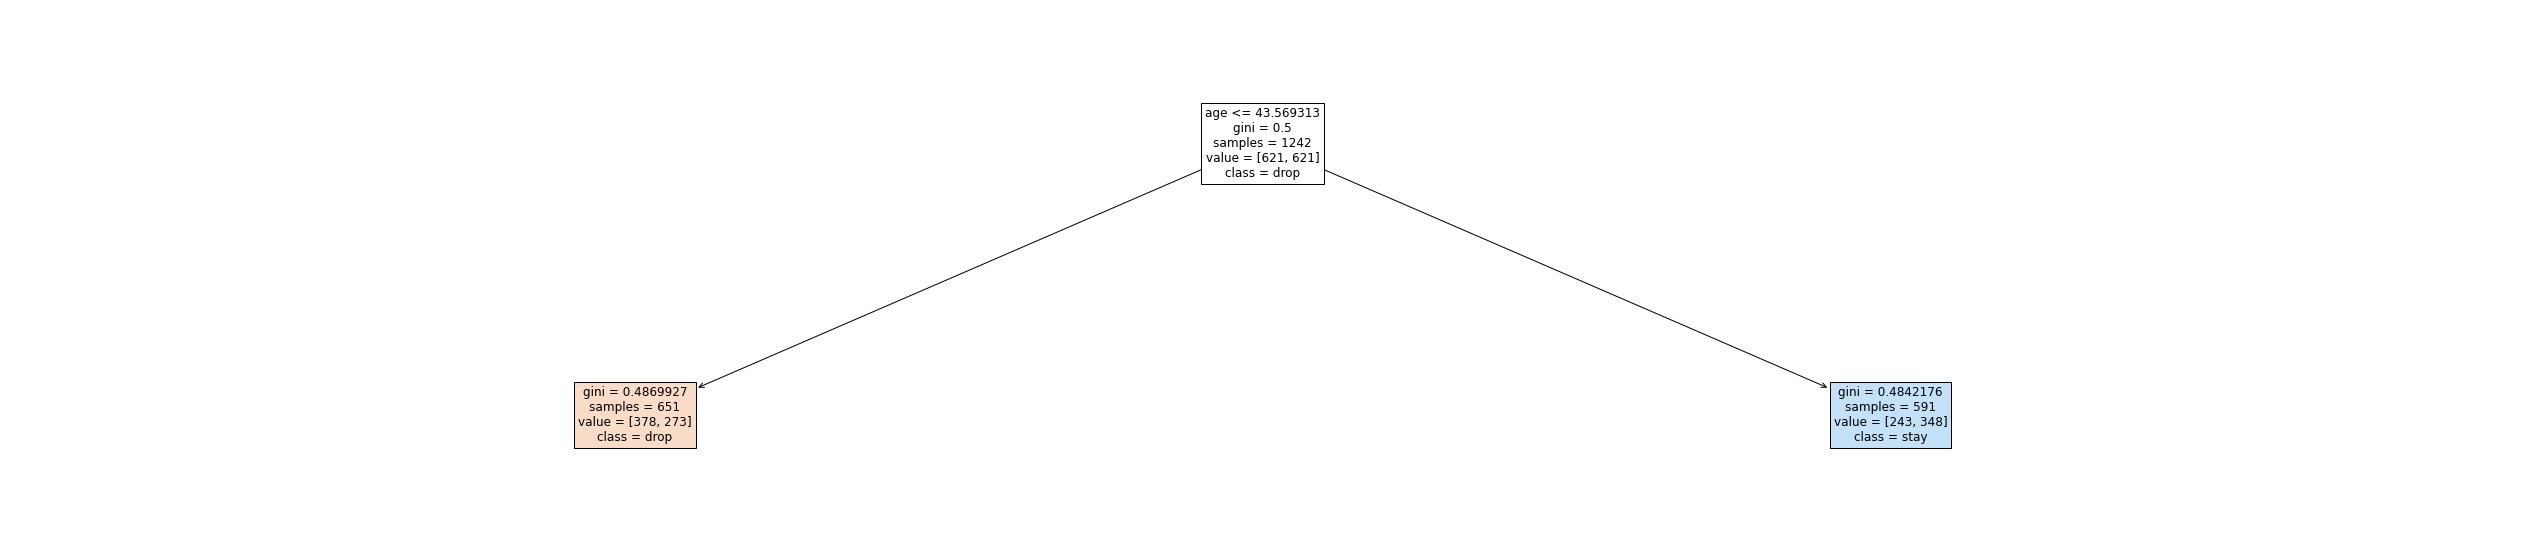

The most important features and its coefficients obtained by logistic regression:
age_group -sd2x2 :  0.003
age :  0.003
CURRENT PERSONAL SITUATION -sd10_retired :  0.003
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.002
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  -0.002
RELIGIOUS AFFILIATION -sd8_none :  0.001
TYPE OF OCCUPATION -sd14_employee :  -0.001
CURRENT PERSONAL SITUATION -sd10_a student at university :  -0.001
dont_know_percentage_mean :  -0.001
OTHER OCCUPATION -sd12_none of the above :  0.001
ADDITIONAL OCCUPATION -sd13_no :  0.001
OTHER OCCUPATION -sd12_a student at university :  -0.001
EVER EMPLOYMENT -sd15_no, neither :  -0.001
HOUSEHOLD SIZE -sd5 :  -0.001
UNION MEMBERSHIP -sd21_don't know :  -0.001
FEDERAL STATE -sd4_Upper Austria :  -0.001
UNION MEMBERSHIP -sd21_yes :  0.001
CURRENT PERSONAL SITUATION -sd10_a student at school :  -0.001
HIGHEST LEVEL OF EDUCATION -sd7 :  -0.001
RELIGIOUS AFFILIATION -sd8_Protestant church :  0.001
voting_age_awareness_w1 

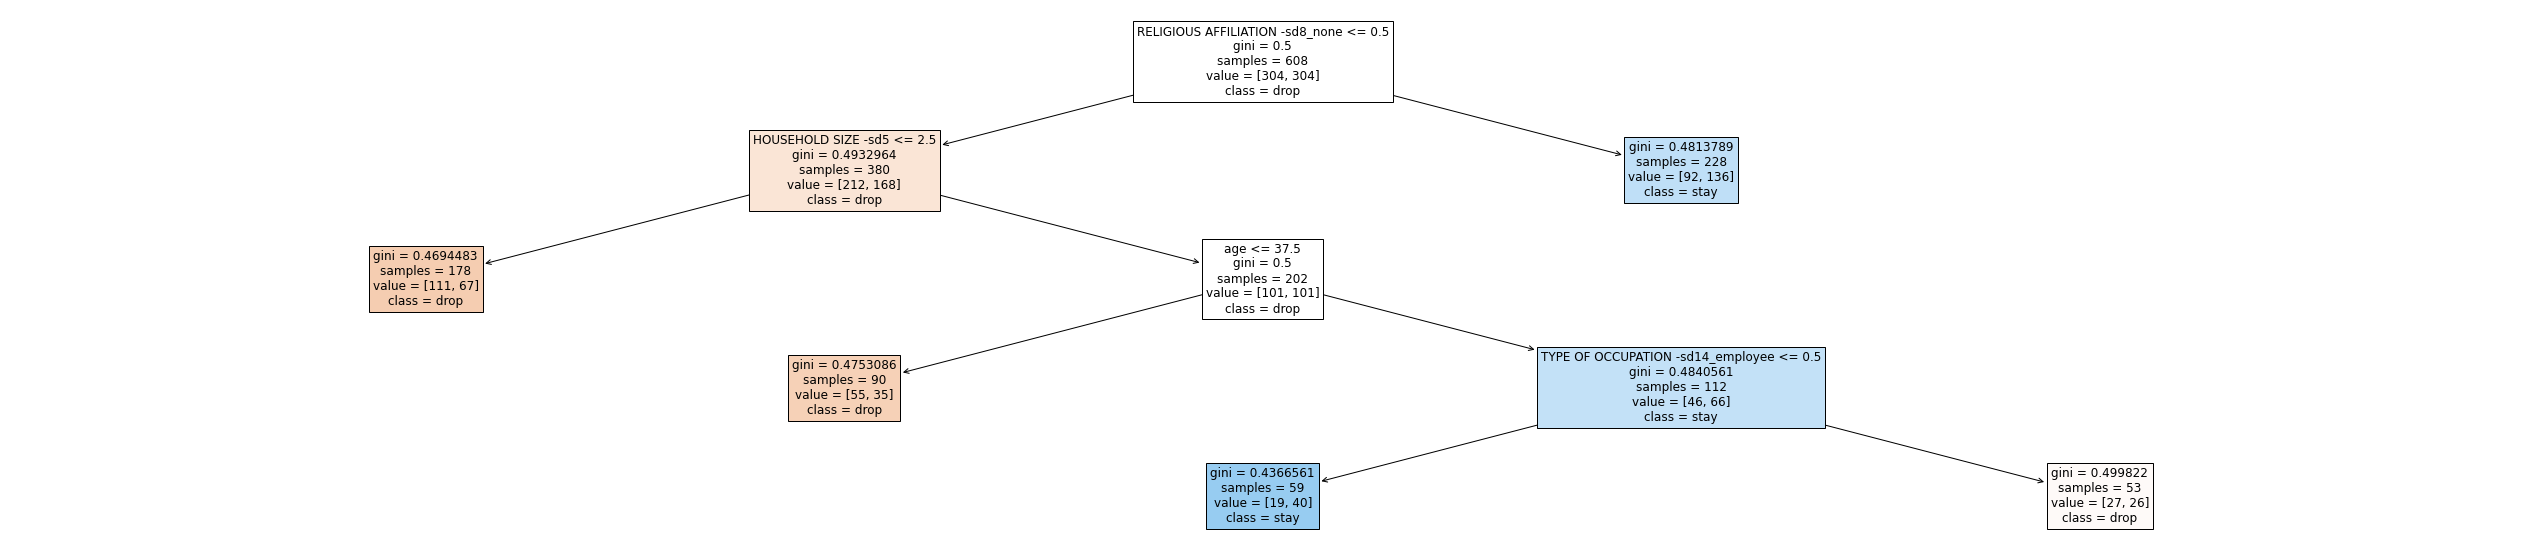

The most important features and its coefficients obtained by logistic regression:
RELIGIOUS AFFILIATION -sd8_none :  0.308
TYPE OF OCCUPATION -sd14_self-employed without employees :  0.215
CURRENT PERSONAL SITUATION -sd10_a student at university :  -0.18
TYPE OF OCCUPATION -sd14_employee :  -0.158
Country of birth, mother -sd19_Austria :  0.158
HOUSEHOLD SIZE -sd5 :  0.152
RELIGIOUS AFFILIATION -sd8_Protestant church :  -0.134
FEDERAL STATE -sd4_Tyrol :  0.125
FEDERAL STATE -sd4_Upper Austria :  -0.122
INCOME SITUATION -sd22 :  0.12
FEDERAL STATE -sd4_Salzburg :  -0.117
TYPE OF OCCUPATION -sd14_public official :  -0.11
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  -0.11
age_group -sd2x2 :  0.107
Country of birth, mother -sd19_Bosnia, Croatia, Serbia :  -0.105
ATTENDANCE OF RELIGIOUS SERVICES -sd9 :  -0.104
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.095
CURRENT PERSONAL SITUATION -sd10_unemployed or seeking for work :  -0.092
CURRENT PERSONAL SITUATION -sd10_unfit for work 

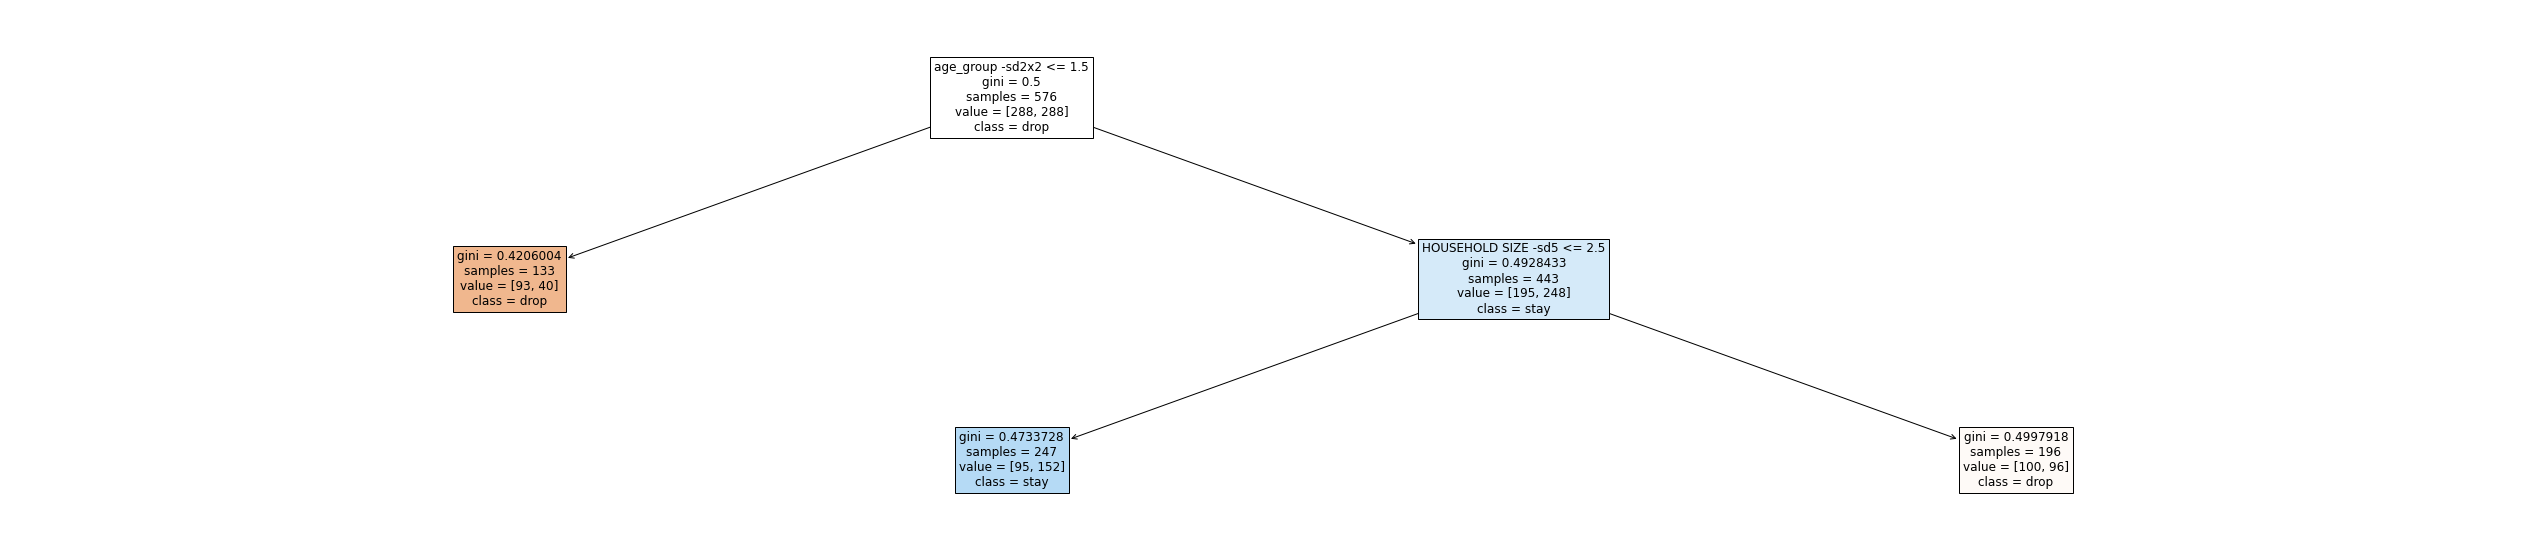

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.968
age_group -sd2x2 :  0.76
PREVIOUS TYPE OF OCCUPATION -sd16_public official :  0.639
dont_know_percentage_mean :  -0.479
HOUSEHOLD SIZE -sd5 :  -0.466
OTHER OCCUPATION -sd12_a student at university :  -0.446
FEDERAL STATE -sd4_Carinthia :  0.442
Country of birth, mother -sd19_Germany :  -0.415
FEDERAL STATE -sd4_Tyrol :  -0.387
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  -0.386
age :  0.385
PREVIOUS TYPE OF OCCUPATION -sd16_civil servant :  -0.382
TYPE OF OCCUPATION -sd14_self-employed without employees :  0.375
JOB SITUATION -sd11 :  -0.365
TYPE OF OCCUPATION -sd14_self-employed with employees :  -0.355
CURRENT PERSONAL SITUATION -sd10_on leave :  -0.345
popnum order :  -0.317
CURRENT PERSONAL SITUATION -sd10_employed :  0.309
OTHER OCCUPATION -sd12_on leave :  0.304
EVER EMPLOYMENT -sd15_no, neither :  -0.302
whether_dropped_before :  -0.968
 
WAVE:  4
Counter

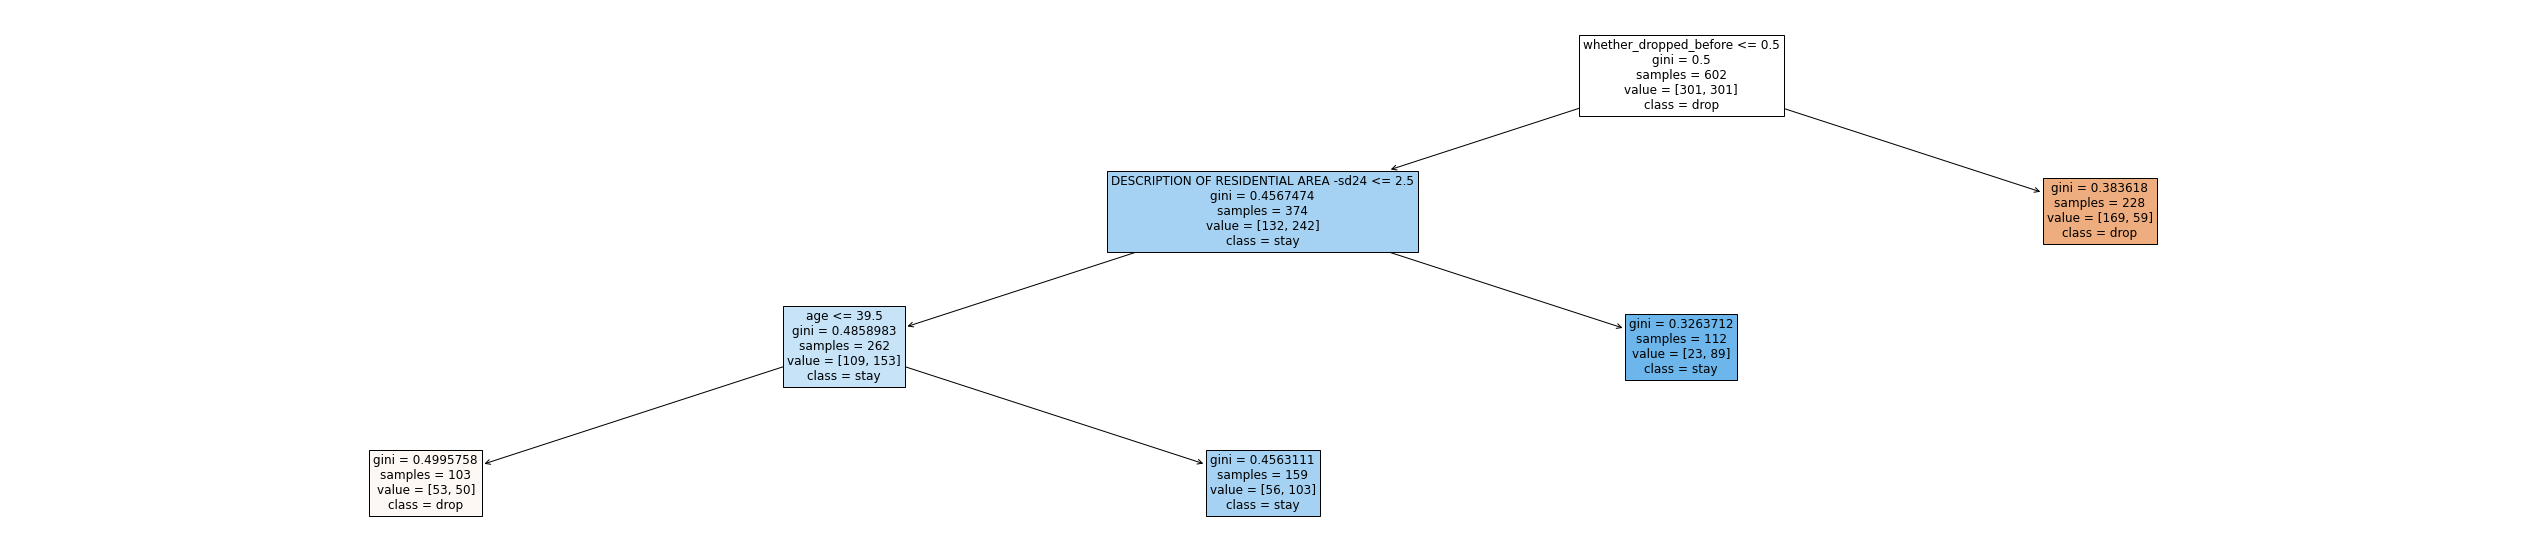

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.909
EVER EMPLOYMENT -sd15_yes, full- or part-time :  0.267
EVER EMPLOYMENT -sd15_no, neither :  -0.236
CURRENT PERSONAL SITUATION -sd10_a student at school :  -0.224
dont_know_percentage_mean :  -0.223
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  0.181
age_group -sd2x2 :  0.18
UNION MEMBERSHIP -sd21_no :  0.178
FEDERAL STATE -sd4_Vienna :  0.168
Country of birth, mother -sd19_Austria :  0.154
OTHER OCCUPATION -sd12_none of the above :  -0.146
Country of birth, father -sd20_Germany :  0.137
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  0.135
CURRENT PERSONAL SITUATION -sd10_on leave :  0.128
UNION MEMBERSHIP -sd21_yes :  -0.125
Country of birth, mother -sd19_Germany :  -0.124
CURRENT PERSONAL SITUATION -sd10_other training :  -0.119
CURRENT PERSONAL SITUATION -sd10_retired :  -0.115
age :  0.114
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.114
whether_dropped_before :  -

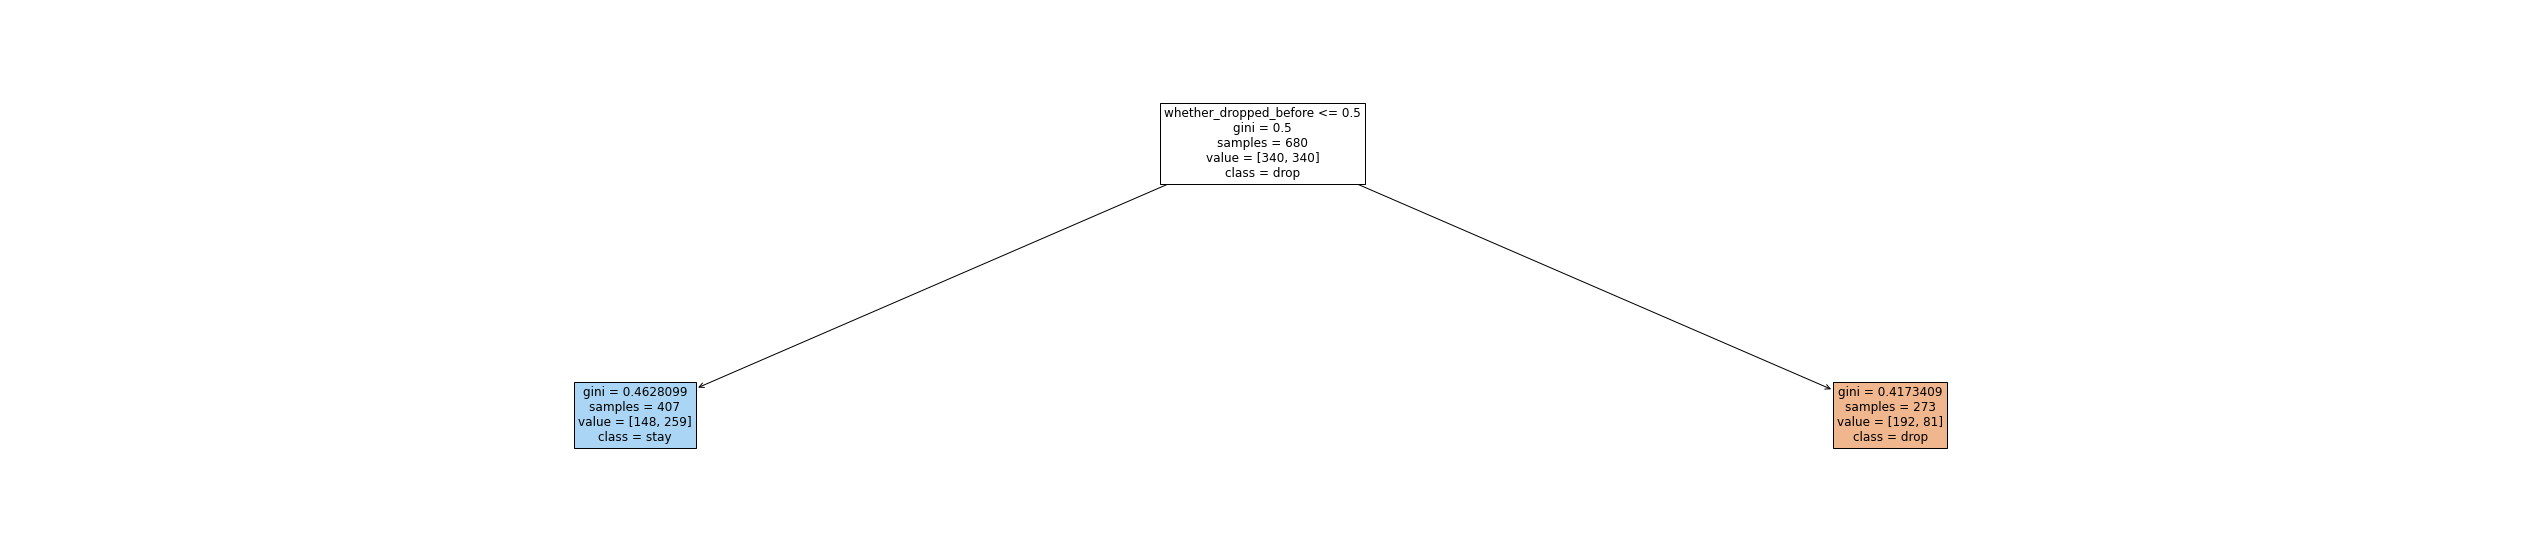

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.873
age :  0.302
RELIGIOUS AFFILIATION -sd8_other :  -0.185
RELIGIOUS AFFILIATION -sd8_none :  0.182
DESCRIPTION OF RESIDENTIAL AREA -sd24 :  -0.177
age_group -sd2x2 :  0.171
FEDERAL STATE -sd4_Vorarlberg :  -0.166
CURRENT PERSONAL SITUATION -sd10_a homemaker :  0.158
dont_know_percentage_mean :  -0.142
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  -0.132
CURRENT PERSONAL SITUATION -sd10_on leave :  -0.127
UNION MEMBERSHIP -sd21_don't know :  0.122
TYPE OF OCCUPATION -sd14_self-employed without employees :  -0.118
FEDERAL STATE -sd4_Tyrol :  0.114
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  -0.11
UNION MEMBERSHIP -sd21_yes :  -0.095
INCOME SITUATION -sd22 :  0.09
FEDERAL STATE -sd4_Styria :  -0.087
ADDITIONAL OCCUPATION -sd13_15 - 35h weekly :  -0.084
PREVIOUS TYPE OF OCCUPATION -sd16_employee :  0.081
whether_dropped_before :  -0.873


In [4]:
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    
    y = df['panelpat']
    #dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat'], axis=1) #, dte.columns[0]
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_train, y_train = undersample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)
    

In [5]:
choose_y = ['y - panelpat: all features'] * 25 + ['y - panelpat: pers+engin'] * 25 + ['y - panelpat: pers+engin, age_gender'] * 25 + ['y - panelpat: personal only'] * 25
wave_list = [x for item in waves for x in repeat(item, 5)]*4

In [6]:
final_results = pd.DataFrame(zip(choose_y,
                                 precision_stay_final, 
                                 precision_drop_final, 
                                 recall_stay_final, 
                                 recall_drop_final, 
                                 recall_general_final,
                                 accuracy_final,
                                 clf_list, 
                                 wave_list,
                                 class_imbalance_final)).T

final_results_test = pd.DataFrame(zip(choose_y,
                                 precision_stay_test, 
                                 precision_drop_test, 
                                 recall_stay_test, 
                                 recall_drop_test, 
                                 recall_general_test,
                                 accuracy_test,
                                 clf_test, 
                                 wave_list,
                                 class_imbalance_test)).T
#final_results = final_results.drop([3], axis=1)
#final_results.columns = list_of_all_models
final_results.index = ['choose_y',
                      'precision_stay, %',
                      'precision_drop, %',
                      'recall_stay, %',
                      'recall_drop, %',
                      'recall_general, %',
                      'accuracy, %',
                      'clf',
                      'wave',
                      'class proportions']
final_results_test.index = final_results.index

final_results = final_results.round(3)
final_results_test = final_results_test.round(3)
#final_results = final_results.mul(100)

final_results = final_results.T.sort_values(by=['recall_drop, %'], ascending=False)
final_results_test = final_results_test.T.sort_values(by=['recall_drop, %'], ascending=False)

#final_results

In [7]:
final_results[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']] = final_results[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']].apply(pd.to_numeric)
final_results = final_results.round(decimals=3)

final_results_test[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']] = final_results_test[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']].apply(pd.to_numeric)
final_results_test = final_results_test.round(decimals=3)

In [8]:
from pivottablejs import pivot_ui
from IPython.display import HTML

In [9]:
pivot_ui(final_results, outfile_path='../../results_html/online_y_panelpat_cv_undersampling.html')
HTML('online_y_panelpat_cv_undersampling.html')

pivot_ui(final_results_test, outfile_path='../../results_html/online_y_panelpat_test_undersampling.html')
HTML('online_y_panelpat_test_undersampling.html')

short results:
* no consistent colution for all waves using only 1 type of clf or dataset
* the best individual recall for each wave is between 0.65 and 0.7